## IS453 Financial Analytics


### Credit scorecard performance evaluation and tuning

**Install scorecardpy**
This is a python version of R package scorecard. The API link has more info :

https://pypi.org/project/scorecardpy/

https://github.com/shichenxie/scorecardpy/

https://cran.r-project.org/web/packages/scorecard/scorecard.pdf

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import scorecardpy as sc
import pprint

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
pd.options.display.max_columns = None


In [4]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Filter Data

In [5]:
# sample code
group_data = pd.read_csv('IS453 Group Assignment - Data.csv')

df_filtered = group_data[group_data['OCCUPATION_TYPE'] == 'Drivers']

In [ ]:
# group_data #307511 rows × 75 columns

In [ ]:
# df_filtered #18603 rows x 75 columns 

## Drop column that is bias in scorecard

In [6]:
df_filtered_forsc = df_filtered.copy()

In [7]:
# drop irrelevant/ bias variables
# CODE_GENDER

biased_col = ['CODE_GENDER']
df_filtered_forsc = df_filtered_forsc.drop(columns = biased_col)

In [8]:
df_filtered_forsc
# 18603 rows × 74 columns

,STATUS,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
13,0,Cash loans,Y,N,1,225000.0,918468.0,28966.5,697500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.016612,-14086,-3028,-643.0,-4911,23.0,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,13,0,0,0,0,0,0,Self-employed,NaN,0.566907,0.770087,0.1474,0.0,0.0,0.0,0.0,-4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
16,0,Cash loans,N,N,0,108000.0,509602.5,26149.5,387000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018634,-12931,-1317,-6392.0,-3866,NaN,1,1,0,1,0,0,Drivers,2.0,2,2,THURSDAY,12,0,0,0,1,1,0,Government,NaN,0.236378,0.062103,NaN,0.0,0.0,0.0,0.0,-3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
24,0,Cash loans,Y,N,2,135000.0,247500.0,12703.5,247500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-11286,-746,-108.0,-3729,7.0,1,1,0,1,0,0,Drivers,4.0,2,2,THURSDAY,14,0,0,0,0,1,1,Business Entity Type 3,NaN,0.786179,0.565608,0.1433,1.0,1.0,1.0,0.0,-4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
33,0,Cash loans,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557.0,-3557,3.0,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,NaN,0.321745,0.411849,NaN,2.0,0.0,2.0,0.0,-697.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
37,0,Cash loans,N,Y,0,121500.0,454500.0,15151.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.030755,-21077,-1288,-5474.0,-4270,NaN,1,1,0,1,1,0,Drivers,2.0,2,2,FRIDAY,10,0,0,0,0,1,1,Transport: type 4,0.804586,0.719799,0.722393,NaN,0.0,0.0,0.0,0.0,-1541.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307425,0,Revolving loans,Y,Y,2,234000.0,450000.0,22500.0,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.022800,-11943,-3214,-5994.0,-3520,7.0,1,1,0,1,0,0,Drivers,4.0,2,2,FRIDAY,13,0,1,1,0,1,1,Industry: type 9,0.216368,0.414246,0.384207,NaN,0.0,0.0,0.0,0.0,-1911.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307432,0,Cash loans,N,Y,0,135000.0,840951.0,42934.5,679500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009175,-18146,-37

# Unique columns and missing values analysis

In [9]:
def show_missing(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output

### columns_infoDF: 74 columns

In [10]:
columns_infoDF = show_missing(df_filtered_forsc)
len(columns_infoDF) #74 columns

74

### Columns that only have 1 unique value

In [11]:
unique_var_df = columns_infoDF[columns_infoDF['unique'] == 1]
unique_var_df.value_counts()

variable          dtype   count  unique  missing  pc_missing
FLAG_DOCUMENT_10  int64   18603  1       0        0.0           1
FLAG_DOCUMENT_12  int64   18603  1       0        0.0           1
FLAG_DOCUMENT_2   int64   18603  1       0        0.0           1
FLAG_DOCUMENT_4   int64   18603  1       0        0.0           1
FLAG_MOBIL        int64   18603  1       0        0.0           1
OCCUPATION_TYPE   object  18603  1       0        0.0           1
dtype: int64

In [12]:
unique_var_list = list(unique_var_df['variable'])
unique_var_list

['FLAG_MOBIL',
 'OCCUPATION_TYPE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_12']

### Drop columns with one unique value as it does not value add to analysis

In [13]:
# sample code

df_filtered_forsc.drop(columns = unique_var_list, inplace=True)
len(df_filtered_forsc.columns)
#from 74 columns to 68 columns ==> 38 categorical, 30 conitinous

68

### Categorical Variables

### columns_infoDF2: 68 columns

In [14]:
columns_infoDF2 = show_missing(df_filtered_forsc)
len(columns_infoDF2)
# columns_infoDF2 #68 variables #38 categorical (discrete and categorical) + 30 continous

68

In [15]:
cat_var_df = columns_infoDF2[(columns_infoDF2['dtype'] == 'object') |  (columns_infoDF2['unique'] == 2)] #Binary and Categorical 
# cat_var_df.info() #38 entries
# cat_var_df 

In [16]:
# categorical variables's  list
cat_var_list = list(cat_var_df['variable'])
print(str(len(cat_var_list)) + " Categorical Variables are " + str(cat_var_list))

38 Categorical Variables are ['STATUS', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


### Continous Variables

In [17]:
cont_var_df = columns_infoDF2[(columns_infoDF2['dtype'] != 'object') &  (columns_infoDF2['unique'] > 2)]
# cont_var_df.info() #30 entries
# cont_var_df

In [18]:
# continous variables's  list
cont_var_list = list(cont_var_df['variable'])
print(str(len(cont_var_list)) + " Continous Variables are " + str(cont_var_list))

30 Continous Variables are ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


### End of Data Exploration

## Data Preparation


### Combining Flag Documents into 1 Column

In [19]:
total_null_values_by_col = pd.DataFrame(df_filtered_forsc.isnull().sum(axis = 0))
total_null_values_by_col['pct_null'] = (total_null_values_by_col[0]/(len(df_filtered_forsc)) * 100).round(5)
total_null_values_by_col.sort_values(by= 0, ascending= False)

,0,pct_null
EXT_SOURCE_1,11768,63.25861
APARTMENTS_AVG,10475,56.30812
OWN_CAR_AGE,5803,31.19389
EXT_SOURCE_3,3944,21.20088
AMT_REQ_CREDIT_BUREAU_HOUR,2628,14.12675
AMT_REQ_CREDIT_BUREAU_YEAR,2628,14.12675
AMT_REQ_CREDIT_BUREAU_DAY,2628,14.12675
AMT_REQ_CREDIT_BUREAU_WEEK,2628,14.12675
AMT_REQ_CREDIT_BUREAU_QRT,2628,14.12675
AMT_REQ_CREDIT_BUREAU_MON,2628,14.12675


In [20]:
flag_docu_list = list(total_null_values_by_col.filter(like="FLAG_DOCUMENT_", axis = 0).index)
return_str = ''
for i in range(len(flag_docu_list)):
    return_str += f"df_filtered_forsc['{flag_docu_list[i]}'] +"
    
print (return_str)

df_filtered_forsc['FLAG_DOCUMENT_3'] +df_filtered_forsc['FLAG_DOCUMENT_5'] +df_filtered_forsc['FLAG_DOCUMENT_6'] +df_filtered_forsc['FLAG_DOCUMENT_7'] +df_filtered_forsc['FLAG_DOCUMENT_8'] +df_filtered_forsc['FLAG_DOCUMENT_9'] +df_filtered_forsc['FLAG_DOCUMENT_11'] +df_filtered_forsc['FLAG_DOCUMENT_13'] +df_filtered_forsc['FLAG_DOCUMENT_14'] +df_filtered_forsc['FLAG_DOCUMENT_15'] +df_filtered_forsc['FLAG_DOCUMENT_16'] +df_filtered_forsc['FLAG_DOCUMENT_17'] +df_filtered_forsc['FLAG_DOCUMENT_18'] +df_filtered_forsc['FLAG_DOCUMENT_19'] +df_filtered_forsc['FLAG_DOCUMENT_20'] +df_filtered_forsc['FLAG_DOCUMENT_21'] +


In [21]:
df_filtered_forsc['TOTAL_FLAG_DOCUMENT'] = df_filtered_forsc['FLAG_DOCUMENT_3'] +df_filtered_forsc['FLAG_DOCUMENT_5'] +df_filtered_forsc['FLAG_DOCUMENT_6'] +df_filtered_forsc['FLAG_DOCUMENT_7'] +df_filtered_forsc['FLAG_DOCUMENT_8'] +df_filtered_forsc['FLAG_DOCUMENT_9'] +df_filtered_forsc['FLAG_DOCUMENT_11'] +df_filtered_forsc['FLAG_DOCUMENT_13'] +df_filtered_forsc['FLAG_DOCUMENT_14'] +df_filtered_forsc['FLAG_DOCUMENT_15'] +df_filtered_forsc['FLAG_DOCUMENT_16'] +df_filtered_forsc['FLAG_DOCUMENT_17'] +df_filtered_forsc['FLAG_DOCUMENT_18'] +df_filtered_forsc['FLAG_DOCUMENT_19'] +df_filtered_forsc['FLAG_DOCUMENT_20'] +df_filtered_forsc['FLAG_DOCUMENT_21']


18603

In [24]:
df_filtered_forsc.drop(columns=['FLAG_DOCUMENT_3',  'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], inplace=True)


## columns_infoDF3: 53 columns

In [25]:
columns_infoDF3 = show_missing(df_filtered_forsc)
len(columns_infoDF3)

53

# Creating Scorecard

**Scorecardpy requires an older version of pandas to be able to accomodate missing values**

So remove missing values for now to be able to test out scorecardpy

### Drop NA

In [26]:
# sample code
df_filtered_forsc.dropna(inplace=True)
df_filtered_forsc.isna().sum()

STATUS                         0
NAME_CONTRACT_TYPE             0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OWN_CAR_AGE                    0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [ ]:
# df_filtered_forsc #1711 rows × 53 columns
# from 74 to 68 to 53 variables

### Column's info after dropping NA (finding unique value =1)

### columns_infoDF4: 53 variables

In [27]:
columns_infoDF4 = show_missing(df_filtered_forsc)
len(columns_infoDF4)

53

In [28]:
one_unique_col_df = columns_infoDF3[columns_infoDF4['unique'] <= 1]

In [29]:
one_unique_col_list = list(one_unique_col_df['variable'])

In [30]:
one_unique_col_list

['FLAG_OWN_CAR']

In [31]:
len(one_unique_col_list)

1

### Drop Variables with Unique Value = 1 after dropping NA values

In [32]:
df_filtered_forsc.drop(columns= one_unique_col_list, inplace=True, axis=1)

In [ ]:
# df_filtered_forsc # 52 columns left

### Categorical Variables

### columninfoDF5: 52 columns

In [33]:
columninfoDF5 = show_missing(df_filtered_forsc) #52 columns
len(columninfoDF5)

52

In [34]:
cat_var_df5 = columninfoDF5[(columninfoDF5['dtype'] == 'object') |  (columninfoDF5['unique'] == 2)]
len(cat_var_df5) #21 categorical,

21

In [35]:
cat_var_df5 = list(cat_var_df5['variable'])
print(str(len(cat_var_df5)) + " Categorical Variables are " + str(cat_var_df5))

21 Categorical Variables are ['STATUS', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE']


### Continous Variables

In [37]:
cont_var_df5 = columninfoDF5[(columninfoDF5['dtype'] != 'object') &  (columninfoDF5['unique'] > 2)]
len(cont_var_df5)

31

In [39]:
# continous variables's  list
cont_var_df5 = list(cont_var_df5['variable'])
print(str(len(cont_var_df5)) + " Continuous Variables are " + str(cont_var_df5))

31 Continuous Variables are ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'TOTAL_FLAG_DOCUMENT']


In [40]:
df_filtered_forsc['STATUS'].value_counts()

0    1582
1     129
Name: STATUS, dtype: int64

In [43]:
# df_filtered_forsc # 1711rows x 52 columns, 52 variables

### Correlation Analysis


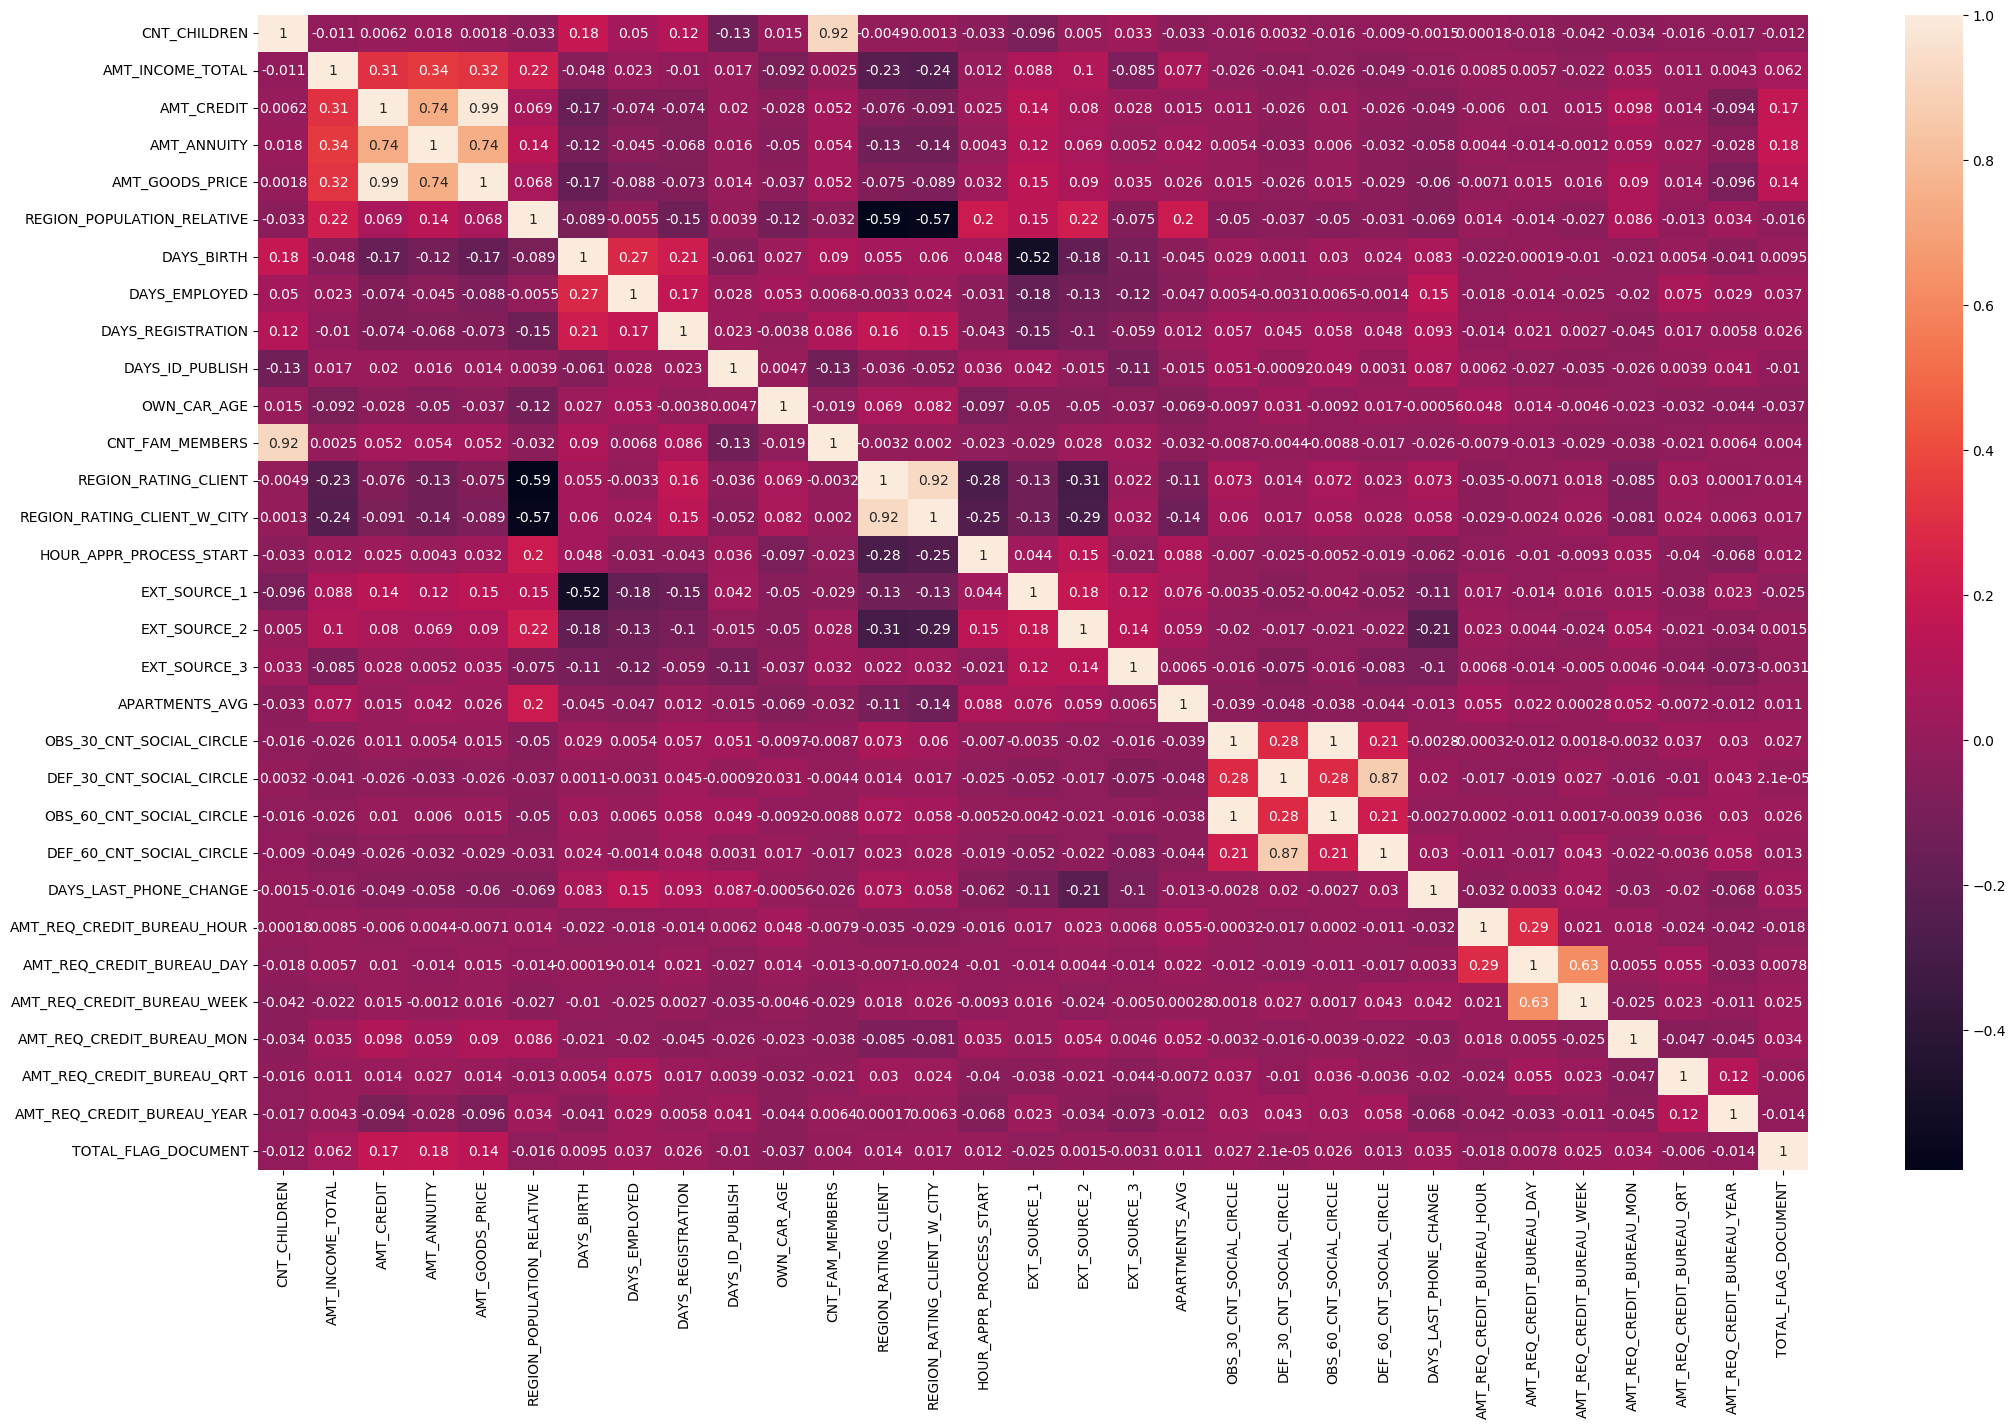

In [45]:
# 23 continous variables
continuous_df = df_filtered_forsc[cont_var_df5]
corr_df = continuous_df.corr()

plt.subplots(figsize=(25,15))
sns.heatmap(corr_df, annot=True)
# 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'

In [46]:
sol = (df_filtered_forsc.corr().where(np.triu(np.ones(df_filtered_forsc.corr().shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

corr_df = pd.DataFrame(sol)
corr_df.head(20)

,,0
OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998776
AMT_CREDIT,AMT_GOODS_PRICE,0.986018
REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,0.925660
REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.919555
CNT_CHILDREN,CNT_FAM_MEMBERS,0.915068
REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,0.905269
DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.873596
AMT_ANNUITY,AMT_GOODS_PRICE,0.744926
AMT_CREDIT,AMT_ANNUITY,0.739024
AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,0.625738


**Drop highly correlated variables (correlation > 0.7)**

In [47]:
drop_col = ['OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE','REGION_RATING_CLIENT_W_CITY','CNT_FAM_MEMBERS',
            'LIVE_REGION_NOT_WORK_REGION','DEF_60_CNT_SOCIAL_CIRCLE','LIVE_CITY_NOT_WORK_CITY', 'AMT_GOODS_PRICE',
            'AMT_ANNUITY']
df_filtered_forsc.drop(columns= drop_col, inplace= True)

In [48]:
df_filtered_forsc.shape #44 cols

(1711, 44)

## Fine classing

**Generate WOE bins**

Woebin() generate groupings as a python dictionary object and also provides a method to plot WOE for the bins.  It will optimize for IV, but will not attempt to make the trend monotonic.

In [49]:
# automatically calculate bin ranges 
bins = sc.woebin(df_filtered_forsc, 'STATUS')

# make it easy to read the bins
for variables , bindetails in bins.items():
    print(variables , " : ")
    display(bindetails)
    print("--"*50)
    
# Keep varaibles that are 0.1 <= total_iv <=0.5 
# look at less that -0.1 as bad predictive

[INFO] creating woe binning ...
Binning on 1711 rows and 44 columns in 00:00:10
NAME_HOUSING_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_HOUSING_TYPE,"Office apartment%,%House / apartment%,%Municip...",1561,0.912332,1451,110,0.070468,-0.072895,0.004700,0.041833,"Office apartment%,%House / apartment%,%Municip...",False
1,NAME_HOUSING_TYPE,"With parents%,%Rented apartment%,%Co-op apartment",150,0.087668,131,19,0.126667,0.575874,0.037133,0.041833,"With parents%,%Rented apartment%,%Co-op apartment",False


----------------------------------------------------------------------------------------------------
OWN_CAR_AGE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OWN_CAR_AGE,"[-inf,2.0)",99,0.057861,93,6,0.060606,-0.234207,0.002875,0.191977,2.0,False
1,OWN_CAR_AGE,"[2.0,3.0)",113,0.066043,110,3,0.026549,-1.095235,0.050684,0.191977,3.0,False
2,OWN_CAR_AGE,"[3.0,9.0)",574,0.335476,533,41,0.071429,-0.058317,0.001113,0.191977,9.0,False
3,OWN_CAR_AGE,"[9.0,12.0)",244,0.142607,232,12,0.049180,-0.455198,0.024411,0.191977,12.0,False
4,OWN_CAR_AGE,"[12.0,15.0)",232,0.135593,204,28,0.120690,0.520717,0.045877,0.191977,15.0,False
5,OWN_CAR_AGE,"[15.0,18.0)",179,0.104617,171,8,0.044693,-0.555589,0.025599,0.191977,18.0,False
6,OWN_CAR_AGE,"[18.0,inf)",270,0.157802,239,31,0.114815,0.464156,0.041419,0.191977,inf,False


----------------------------------------------------------------------------------------------------
EXT_SOURCE_2  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,EXT_SOURCE_2,"[-inf,0.30000000000000004)",190,0.111046,153,37,0.194737,1.087113,0.206670,0.326924,0.30000000000000004,False
1,EXT_SOURCE_2,"[0.30000000000000004,0.4)",125,0.073057,111,14,0.112000,0.436160,0.016732,0.326924,0.4,False
2,EXT_SOURCE_2,"[0.4,0.7000000000000001)",1034,0.604325,970,64,0.061896,-0.211780,0.024783,0.326924,0.7000000000000001,False
3,EXT_SOURCE_2,"[0.7000000000000001,inf)",362,0.211572,348,14,0.038674,-0.706512,0.078739,0.326924,inf,False


----------------------------------------------------------------------------------------------------
DEF_30_CNT_SOCIAL_CIRCLE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DEF_30_CNT_SOCIAL_CIRCLE,"[-inf,1.0)",1530,0.894214,1425,105,0.068627,-0.101334,0.008796,0.063348,1.0,False
1,DEF_30_CNT_SOCIAL_CIRCLE,"[1.0,inf)",181,0.105786,157,24,0.132597,0.628441,0.054552,0.063348,inf,False


----------------------------------------------------------------------------------------------------
DAYS_BIRTH  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_BIRTH,"[-inf,-20000.0)",99,0.057861,91,8,0.080808,0.075215,0.000338,0.170573,-20000.0,False
1,DAYS_BIRTH,"[-20000.0,-14500.0)",708,0.413793,671,37,0.052260,-0.391218,0.053724,0.170573,-14500.0,False
2,DAYS_BIRTH,"[-14500.0,-13000.0)",321,0.187610,288,33,0.102804,0.340180,0.025094,0.170573,-13000.0,False
3,DAYS_BIRTH,"[-13000.0,-12500.0)",89,0.052016,87,2,0.022472,-1.266128,0.049999,0.170573,-12500.0,False
4,DAYS_BIRTH,"[-12500.0,-12000.0)",91,0.053185,85,6,0.065934,-0.144259,0.001041,0.170573,-12000.0,False
5,DAYS_BIRTH,"[-12000.0,inf)",403,0.235535,360,43,0.106700,0.381729,0.040377,0.170573,inf,False


----------------------------------------------------------------------------------------------------
DAYS_EMPLOYED  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_EMPLOYED,"[-inf,-3800.0)",224,0.130918,217,7,0.031250,-0.927354,0.076882,0.200266,-3800.0,False
1,DAYS_EMPLOYED,"[-3800.0,-2800.0)",181,0.105786,165,16,0.088398,0.173276,0.003419,0.200266,-2800.0,False
2,DAYS_EMPLOYED,"[-2800.0,-2200.0)",147,0.085915,143,4,0.027211,-1.069918,0.063536,0.200266,-2200.0,False
3,DAYS_EMPLOYED,"[-2200.0,-1600.0)",202,0.118060,190,12,0.059406,-0.255485,0.006918,0.200266,-1600.0,False
4,DAYS_EMPLOYED,"[-1600.0,-1200.0)",182,0.106371,160,22,0.120879,0.522501,0.036264,0.200266,-1200.0,False
5,DAYS_EMPLOYED,"[-1200.0,inf)",775,0.452951,707,68,0.087742,0.165110,0.013247,0.200266,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_DAY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_DAY,"[-inf,inf)",1711,1.0,1582,129,0.075395,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REGION_RATING_CLIENT,"[-inf,2.0)",308,0.180012,289,19,0.061688,-0.215355,0.007622,0.05967,2.0,False
1,REGION_RATING_CLIENT,"[2.0,3.0)",1184,0.691993,1101,83,0.070101,-0.078501,0.004125,0.05967,3.0,False
2,REGION_RATING_CLIENT,"[3.0,inf)",219,0.127995,192,27,0.123288,0.544974,0.047923,0.05967,inf,False


----------------------------------------------------------------------------------------------------
NAME_FAMILY_STATUS  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_FAMILY_STATUS,Married,1257,0.734658,1175,82,0.065235,-0.155671,0.016668,0.054815,Married,False
1,NAME_FAMILY_STATUS,Single / not married,204,0.119229,184,20,0.098039,0.287429,0.011132,0.054815,Single / not married,False
2,NAME_FAMILY_STATUS,"Civil marriage%,%Widow%,%Separated",250,0.146113,223,27,0.108000,0.395298,0.027015,0.054815,"Civil marriage%,%Widow%,%Separated",False


----------------------------------------------------------------------------------------------------
ORGANIZATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,ORGANIZATION_TYPE,"Advertising%,%Transport: type 1%,%Trade: type ...",266,0.155465,265,1,0.003759,-3.073097,0.490950,0.641541,"Advertising%,%Transport: type 1%,%Trade: type ...",False
1,ORGANIZATION_TYPE,"Government%,%Trade: type 7%,%Industry: type 3%...",173,0.101110,167,6,0.034682,-0.819602,0.048398,0.641541,"Government%,%Trade: type 7%,%Industry: type 3%...",False
2,ORGANIZATION_TYPE,"Military%,%Business Entity Type 3%,%Business E...",643,0.375804,594,49,0.076205,0.011574,0.000051,0.641541,"Military%,%Business Entity Type 3%,%Business E...",False
3,ORGANIZATION_TYPE,"Self-employed%,%Transport: type 4%,%Medicine%,...",629,0.367621,556,73,0.116057,0.476324,0.102142,0.641541,"Self-employed%,%Transport: type 4%,%Medicine%,...",False


----------------------------------------------------------------------------------------------------
NAME_CONTRACT_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_CONTRACT_TYPE,Revolving loans,128,0.07481,125,3,0.023438,-1.223069,0.068196,0.071473,Revolving loans,False
1,NAME_CONTRACT_TYPE,Cash loans,1583,0.92519,1457,126,0.079596,0.058780,0.003277,0.071473,Cash loans,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_WEEK  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_WEEK,"[-inf,inf)",1711,1.0,1582,129,0.075395,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_HOUR  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_HOUR,"[-inf,inf)",1711,1.0,1582,129,0.075395,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT,"[-inf,350000.0)",538,0.314436,503,35,0.065056,-0.158609,0.007397,0.202578,350000.0,False
1,AMT_CREDIT,"[350000.0,550000.0)",338,0.197545,298,40,0.118343,0.498419,0.060662,0.202578,550000.0,False
2,AMT_CREDIT,"[550000.0,750000.0)",266,0.155465,240,26,0.097744,0.284090,0.014160,0.202578,750000.0,False
3,AMT_CREDIT,"[750000.0,950000.0)",227,0.132671,212,15,0.066079,-0.141903,0.002516,0.202578,950000.0,False
4,AMT_CREDIT,"[950000.0,1200000.0)",157,0.091759,154,3,0.019108,-1.431708,0.106074,0.202578,1200000.0,False
5,AMT_CREDIT,"[1200000.0,inf)",185,0.108124,175,10,0.054054,-0.355568,0.011769,0.202578,inf,False


----------------------------------------------------------------------------------------------------
FLAG_PHONE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_PHONE,"[-inf,1.0)",1161,0.678551,1068,93,0.080103,0.065689,0.003011,0.009981,1.0,False
1,FLAG_PHONE,"[1.0,inf)",550,0.321449,514,36,0.065455,-0.152072,0.006970,0.009981,inf,False


----------------------------------------------------------------------------------------------------
FLAG_OWN_REALTY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_OWN_REALTY,N,610,0.356517,565,45,0.073770,-0.023530,0.000195,0.000302,N,False
1,FLAG_OWN_REALTY,Y,1101,0.643483,1017,84,0.076294,0.012837,0.000107,0.000302,Y,False


----------------------------------------------------------------------------------------------------
DAYS_LAST_PHONE_CHANGE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_LAST_PHONE_CHANGE,"[-inf,-2400.0)",166,0.097019,157,9,0.054217,-0.352388,0.010386,0.081469,-2400.0,False
1,DAYS_LAST_PHONE_CHANGE,"[-2400.0,-1800.0)",210,0.122735,188,22,0.104762,0.361233,0.018678,0.081469,-1800.0,False
2,DAYS_LAST_PHONE_CHANGE,"[-1800.0,-1500.0)",206,0.120397,189,17,0.082524,0.098099,0.001208,0.081469,-1500.0,False
3,DAYS_LAST_PHONE_CHANGE,"[-1500.0,-800.0)",366,0.213910,345,21,0.057377,-0.292389,0.016166,0.081469,-800.0,False
4,DAYS_LAST_PHONE_CHANGE,"[-800.0,-600.0)",139,0.081239,129,10,0.071942,-0.050595,0.000204,0.081469,-600.0,False
5,DAYS_LAST_PHONE_CHANGE,"[-600.0,-500.0)",94,0.054939,84,10,0.106383,0.378401,0.009241,0.081469,-500.0,False
6,DAYS_LAST_PHONE_CHANGE,"[-500.0,-300.0)",136,0.079486,130,6,0.044118,-0.569142,0.020297,0.081469,-300.0,False
7,DAYS_LAST_PHONE_CHANGE,"[-300.0,inf)",394,0.230275,360,34,0.086294,0.146889,0.005289,0.081469,inf,False


----------------------------------------------------------------------------------------------------
EXT_SOURCE_3  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,EXT_SOURCE_3,"[-inf,0.30000000000000004)",327,0.191116,275,52,0.159021,0.841105,0.192840,0.342472,0.30000000000000004,False
1,EXT_SOURCE_3,"[0.30000000000000004,0.4)",221,0.129164,199,22,0.099548,0.304370,0.013621,0.342472,0.4,False
2,EXT_SOURCE_3,"[0.4,inf)",1163,0.679719,1108,55,0.047291,-0.496346,0.136010,0.342472,inf,False


----------------------------------------------------------------------------------------------------
TOTAL_FLAG_DOCUMENT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,TOTAL_FLAG_DOCUMENT,"[-inf,1.0)",129,0.075395,126,3,0.023256,-1.231037,0.069418,0.072772,1.0,False
1,TOTAL_FLAG_DOCUMENT,"[1.0,inf)",1582,0.924605,1456,126,0.079646,0.059466,0.003353,0.072772,inf,False


----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_INCOME_TYPE,"Student%,%State servant",94,0.054939,90,4,0.042553,-0.606883,0.015707,0.03484,"Student%,%State servant",False
1,NAME_INCOME_TYPE,Commercial associate,480,0.280538,450,30,0.062500,-0.201417,0.010452,0.03484,Commercial associate,False
2,NAME_INCOME_TYPE,Working,1137,0.664524,1042,95,0.083553,0.111612,0.008681,0.03484,Working,False


----------------------------------------------------------------------------------------------------
FLAG_EMAIL  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_EMAIL,"[-inf,1.0)",1546,0.903565,1432,114,0.073739,-0.023996,0.000515,0.004894,1.0,False
1,FLAG_EMAIL,"[1.0,inf)",165,0.096435,150,15,0.090909,0.204048,0.004379,0.004894,inf,False


----------------------------------------------------------------------------------------------------
CNT_CHILDREN  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CNT_CHILDREN,"[-inf,1.0)",998,0.583285,917,81,0.081162,0.079974,0.003860,0.021953,1.0,False
1,CNT_CHILDREN,"[1.0,2.0)",466,0.272355,431,35,0.075107,-0.004127,0.000005,0.021953,2.0,False
2,CNT_CHILDREN,"[2.0,inf)",247,0.144360,234,13,0.052632,-0.383739,0.018089,0.021953,inf,False


----------------------------------------------------------------------------------------------------
REG_REGION_NOT_LIVE_REGION  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REG_REGION_NOT_LIVE_REGION,"[-inf,inf)",1711,1.0,1582,129,0.075395,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
DAYS_ID_PUBLISH  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_ID_PUBLISH,"[-inf,-4400.0)",385,0.225015,356,29,0.075325,-0.001002,2.258902e-07,0.134994,-4400.0,False
1,DAYS_ID_PUBLISH,"[-4400.0,-4200.0)",150,0.087668,144,6,0.040000,-0.671421,2.988656e-02,0.134994,-4200.0,False
2,DAYS_ID_PUBLISH,"[-4200.0,-3500.0)",306,0.178843,287,19,0.062092,-0.208410,7.112864e-03,0.134994,-3500.0,False
3,DAYS_ID_PUBLISH,"[-3500.0,-2700.0)",242,0.141438,214,28,0.115702,0.472861,3.867175e-02,0.134994,-2700.0,False
4,DAYS_ID_PUBLISH,"[-2700.0,-2200.0)",124,0.072472,120,4,0.032258,-0.894565,4.011729e-02,0.134994,-2200.0,False
5,DAYS_ID_PUBLISH,"[-2200.0,-400.0)",397,0.232028,360,37,0.093199,0.231447,1.371591e-02,0.134994,-400.0,False
6,DAYS_ID_PUBLISH,"[-400.0,inf)",107,0.062537,101,6,0.056075,-0.316728,5.489411e-03,0.134994,inf,False


----------------------------------------------------------------------------------------------------
REGION_POPULATION_RELATIVE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REGION_POPULATION_RELATIVE,"[-inf,0.01)",340,0.198714,322,18,0.052941,-0.377547,0.024165,0.090261,0.01,False
1,REGION_POPULATION_RELATIVE,"[0.01,0.02)",548,0.320281,503,45,0.082117,0.092705,0.002863,0.090261,0.02,False
2,REGION_POPULATION_RELATIVE,"[0.02,0.03)",378,0.220923,338,40,0.105820,0.372466,0.035915,0.090261,0.03,False
3,REGION_POPULATION_RELATIVE,"[0.03,0.04)",228,0.133255,213,15,0.065789,-0.146609,0.002692,0.090261,0.04,False
4,REGION_POPULATION_RELATIVE,"[0.04,0.05)",115,0.067212,108,7,0.060870,-0.229588,0.003215,0.090261,0.05,False
5,REGION_POPULATION_RELATIVE,"[0.05,inf)",102,0.059614,98,4,0.039216,-0.692040,0.021411,0.090261,inf,False


----------------------------------------------------------------------------------------------------
HOUR_APPR_PROCESS_START  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,HOUR_APPR_PROCESS_START,"[-inf,10.0)",313,0.182934,292,21,0.067093,-0.125599,0.002736,0.066806,10.0,False
1,HOUR_APPR_PROCESS_START,"[10.0,17.0)",1204,0.703682,1107,97,0.080565,0.071935,0.003754,0.066806,17.0,False
2,HOUR_APPR_PROCESS_START,"[17.0,18.0)",95,0.055523,93,2,0.021053,-1.332820,0.057688,0.066806,18.0,False
3,HOUR_APPR_PROCESS_START,"[18.0,inf)",99,0.057861,90,9,0.090909,0.204048,0.002628,0.066806,inf,False


----------------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_EDUCATION_TYPE,"Lower secondary%,%Higher education",282,0.164816,271,11,0.039007,-0.697591,0.060014,0.068512,"Lower secondary%,%Higher education",False
1,NAME_EDUCATION_TYPE,"Secondary / secondary special%,%Incomplete higher",1429,0.835184,1311,118,0.082575,0.098772,0.008497,0.068512,"Secondary / secondary special%,%Incomplete higher",False


----------------------------------------------------------------------------------------------------
FLAG_CONT_MOBILE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_CONT_MOBILE,"[-inf,inf)",1711,1.0,1582,129,0.075395,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
EXT_SOURCE_1  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,EXT_SOURCE_1,"[-inf,0.2)",233,0.136178,198,35,0.150215,0.773714,0.113086,0.279114,0.2,False
1,EXT_SOURCE_1,"[0.2,0.4)",621,0.362946,567,54,0.086957,0.155257,0.009346,0.279114,0.4,False
2,EXT_SOURCE_1,"[0.4,0.6000000000000001)",520,0.303916,490,30,0.057692,-0.286575,0.022117,0.279114,0.6000000000000001,False
3,EXT_SOURCE_1,"[0.6000000000000001,0.7000000000000001)",173,0.101110,169,4,0.023121,-1.236972,0.093786,0.279114,0.7000000000000001,False
4,EXT_SOURCE_1,"[0.7000000000000001,inf)",164,0.095850,158,6,0.036585,-0.764203,0.040779,0.279114,inf,False


----------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_INCOME_TOTAL,"[-inf,150000.0)",420,0.245470,387,33,0.078571,0.044716,0.000500,0.061717,150000.0,False
1,AMT_INCOME_TOTAL,"[150000.0,180000.0)",214,0.125073,193,21,0.098131,0.288465,0.011767,0.061717,180000.0,False
2,AMT_INCOME_TOTAL,"[180000.0,190000.0)",213,0.124489,202,11,0.051643,-0.403740,0.017125,0.061717,190000.0,False
3,AMT_INCOME_TOTAL,"[190000.0,270000.0)",482,0.281707,439,43,0.089212,0.183333,0.010237,0.061717,270000.0,False
4,AMT_INCOME_TOTAL,"[270000.0,inf)",382,0.223261,361,21,0.054974,-0.337723,0.022088,0.061717,inf,False


----------------------------------------------------------------------------------------------------
FLAG_WORK_PHONE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_WORK_PHONE,"[-inf,1.0)",1351,0.789597,1250,101,0.074759,-0.009146,0.000066,0.000308,1.0,False
1,FLAG_WORK_PHONE,"[1.0,inf)",360,0.210403,332,28,0.077778,0.033702,0.000242,0.000308,inf,False


----------------------------------------------------------------------------------------------------
REG_CITY_NOT_LIVE_CITY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REG_CITY_NOT_LIVE_CITY,"[-inf,inf)",1711,1.0,1582,129,0.075395,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
FLAG_EMP_PHONE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_EMP_PHONE,"[-inf,inf)",1711,1.0,1582,129,0.075395,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
OBS_30_CNT_SOCIAL_CIRCLE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OBS_30_CNT_SOCIAL_CIRCLE,"[-inf,1.0)",884,0.516657,825,59,0.066742,-0.131213,0.008414,0.061044,1.0,False
1,OBS_30_CNT_SOCIAL_CIRCLE,"[1.0,2.0)",308,0.180012,277,31,0.100649,0.316602,0.020647,0.061044,2.0,False
2,OBS_30_CNT_SOCIAL_CIRCLE,"[2.0,4.0)",270,0.157802,247,23,0.085185,0.132739,0.002942,0.061044,4.0,False
3,OBS_30_CNT_SOCIAL_CIRCLE,"[4.0,6.0)",143,0.083577,137,6,0.041958,-0.621589,0.024918,0.061044,6.0,False
4,OBS_30_CNT_SOCIAL_CIRCLE,"[6.0,inf)",106,0.061952,96,10,0.094340,0.244870,0.004123,0.061044,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_QRT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_QRT,"[-inf,1.0)",1384,0.808884,1281,103,0.074422,-0.014035,0.000158,0.008295,1.0,False
1,AMT_REQ_CREDIT_BUREAU_QRT,"[1.0,2.0)",229,0.133840,213,16,0.069869,-0.082071,0.000871,0.008295,2.0,False
2,AMT_REQ_CREDIT_BUREAU_QRT,"[2.0,inf)",98,0.057276,88,10,0.102041,0.331881,0.007266,0.008295,inf,False


----------------------------------------------------------------------------------------------------
REG_REGION_NOT_WORK_REGION  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REG_REGION_NOT_WORK_REGION,"[-inf,1.0)",1592,0.93045,1473,119,0.074749,-0.00930,0.000080,0.001096,1.0,False
1,REG_REGION_NOT_WORK_REGION,"[1.0,inf)",119,0.06955,109,10,0.084034,0.11787,0.001016,0.001096,inf,False


----------------------------------------------------------------------------------------------------
APARTMENTS_AVG  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,APARTMENTS_AVG,"[-inf,0.02)",210,0.122735,195,15,0.071429,-0.058317,0.000407,0.12341,0.02,False
1,APARTMENTS_AVG,"[0.02,0.05)",175,0.102279,156,19,0.108571,0.401216,0.019530,0.12341,0.05,False
2,APARTMENTS_AVG,"[0.05,0.1)",569,0.332554,531,38,0.066784,-0.130543,0.005362,0.12341,0.1,False
3,APARTMENTS_AVG,"[0.1,0.12)",158,0.092344,150,8,0.050633,-0.424561,0.013926,0.12341,0.12,False
4,APARTMENTS_AVG,"[0.12,0.18)",290,0.169492,260,30,0.103448,0.347148,0.023679,0.12341,0.18,False
5,APARTMENTS_AVG,"[0.18,0.23)",120,0.070134,117,3,0.025000,-1.156929,0.058658,0.12341,0.23,False
6,APARTMENTS_AVG,"[0.23,inf)",189,0.110462,173,16,0.084656,0.125930,0.001848,0.12341,inf,False


----------------------------------------------------------------------------------------------------
WEEKDAY_APPR_PROCESS_START  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,WEEKDAY_APPR_PROCESS_START,"SATURDAY%,%SUNDAY",286,0.167154,275,11,0.038462,-0.712243,0.063076,0.090882,"SATURDAY%,%SUNDAY",False
1,WEEKDAY_APPR_PROCESS_START,"THURSDAY%,%TUESDAY%,%WEDNESDAY",862,0.503799,798,64,0.074246,-0.016593,0.000138,0.090882,"THURSDAY%,%TUESDAY%,%WEDNESDAY",False
2,WEEKDAY_APPR_PROCESS_START,MONDAY,301,0.175921,274,27,0.089701,0.189342,0.006836,0.090882,MONDAY,False
3,WEEKDAY_APPR_PROCESS_START,FRIDAY,262,0.153127,235,27,0.103053,0.342884,0.020832,0.090882,FRIDAY,False


----------------------------------------------------------------------------------------------------
REG_CITY_NOT_WORK_CITY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REG_CITY_NOT_WORK_CITY,"[-inf,1.0)",1402,0.819404,1296,106,0.075606,0.003034,0.000008,0.000042,1.0,False
1,REG_CITY_NOT_WORK_CITY,"[1.0,inf)",309,0.180596,286,23,0.074434,-0.013865,0.000035,0.000042,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_YEAR  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_YEAR,"[-inf,3.0)",1193,0.697253,1113,80,0.067058,-0.126155,0.010519,0.045171,3.0,False
1,AMT_REQ_CREDIT_BUREAU_YEAR,"[3.0,4.0)",226,0.132086,208,18,0.079646,0.059466,0.000479,0.045171,4.0,False
2,AMT_REQ_CREDIT_BUREAU_YEAR,"[4.0,5.0)",138,0.080655,121,17,0.123188,0.544056,0.030085,0.045171,5.0,False
3,AMT_REQ_CREDIT_BUREAU_YEAR,"[5.0,inf)",154,0.090006,140,14,0.090909,0.204048,0.004087,0.045171,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_MON  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_MON,"[-inf,1.0)",1359,0.794272,1256,103,0.075791,0.005674,0.000026,0.000496,1.0,False
1,AMT_REQ_CREDIT_BUREAU_MON,"[1.0,2.0)",251,0.146698,232,19,0.075697,0.004334,0.000003,0.000496,2.0,False
2,AMT_REQ_CREDIT_BUREAU_MON,"[2.0,inf)",101,0.059030,94,7,0.069307,-0.090752,0.000468,0.000496,inf,False


----------------------------------------------------------------------------------------------------
DAYS_REGISTRATION  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_REGISTRATION,"[-inf,-6500.0)",489,0.285798,469,20,0.040900,-0.648238,0.091675,0.147837,-6500.0,False
1,DAYS_REGISTRATION,"[-6500.0,-5500.0)",162,0.094681,152,10,0.061728,-0.214663,0.003984,0.147837,-5500.0,False
2,DAYS_REGISTRATION,"[-5500.0,-500.0)",899,0.525424,820,79,0.087875,0.166776,0.015689,0.147837,-500.0,False
3,DAYS_REGISTRATION,"[-500.0,inf)",161,0.094097,141,20,0.124224,0.553605,0.036489,0.147837,inf,False


----------------------------------------------------------------------------------------------------
NAME_TYPE_SUITE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_TYPE_SUITE,"Children%,%Other_A%,%Family",211,0.12332,197,14,0.066351,-0.137514,0.00220,0.00249,"Children%,%Other_A%,%Family",False
1,NAME_TYPE_SUITE,"Unaccompanied%,%Spouse, partner%,%Other_B",1500,0.87668,1385,115,0.076667,0.018109,0.00029,0.00249,"Unaccompanied%,%Spouse, partner%,%Other_B",False


----------------------------------------------------------------------------------------------------


In [50]:
# automatically calculate bin ranges 
bins = sc.woebin(df_filtered_forsc, 'STATUS')

# make it easy to read the bins
for variables , bindetails in bins.items():
    print(variables , " : ")
    display(bindetails['total_iv'])
    print("--"*50)
    
# look at less that -0.1 as bad predictive

[INFO] creating woe binning ...
Binning on 1711 rows and 44 columns in 00:00:10
NAME_HOUSING_TYPE  : 


0    0.041833
1    0.041833
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
OWN_CAR_AGE  : 


0    0.191977
1    0.191977
2    0.191977
3    0.191977
4    0.191977
5    0.191977
6    0.191977
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
EXT_SOURCE_2  : 


0    0.326924
1    0.326924
2    0.326924
3    0.326924
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
DEF_30_CNT_SOCIAL_CIRCLE  : 


0    0.063348
1    0.063348
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
DAYS_BIRTH  : 


0    0.170573
1    0.170573
2    0.170573
3    0.170573
4    0.170573
5    0.170573
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
DAYS_EMPLOYED  : 


0    0.200266
1    0.200266
2    0.200266
3    0.200266
4    0.200266
5    0.200266
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_DAY  : 


0    0.0
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT  : 


0    0.05967
1    0.05967
2    0.05967
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
NAME_FAMILY_STATUS  : 


0    0.054815
1    0.054815
2    0.054815
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
ORGANIZATION_TYPE  : 


0    0.641541
1    0.641541
2    0.641541
3    0.641541
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
NAME_CONTRACT_TYPE  : 


0    0.071473
1    0.071473
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_WEEK  : 


0    0.0
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_HOUR  : 


0    0.0
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
AMT_CREDIT  : 


0    0.202578
1    0.202578
2    0.202578
3    0.202578
4    0.202578
5    0.202578
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
FLAG_PHONE  : 


0    0.009981
1    0.009981
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
FLAG_OWN_REALTY  : 


0    0.000302
1    0.000302
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
DAYS_LAST_PHONE_CHANGE  : 


0    0.081469
1    0.081469
2    0.081469
3    0.081469
4    0.081469
5    0.081469
6    0.081469
7    0.081469
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
EXT_SOURCE_3  : 


0    0.342472
1    0.342472
2    0.342472
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
TOTAL_FLAG_DOCUMENT  : 


0    0.072772
1    0.072772
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE  : 


0    0.03484
1    0.03484
2    0.03484
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
FLAG_EMAIL  : 


0    0.004894
1    0.004894
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
CNT_CHILDREN  : 


0    0.021953
1    0.021953
2    0.021953
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
REG_REGION_NOT_LIVE_REGION  : 


0    0.0
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
DAYS_ID_PUBLISH  : 


0    0.134994
1    0.134994
2    0.134994
3    0.134994
4    0.134994
5    0.134994
6    0.134994
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
REGION_POPULATION_RELATIVE  : 


0    0.090261
1    0.090261
2    0.090261
3    0.090261
4    0.090261
5    0.090261
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
HOUR_APPR_PROCESS_START  : 


0    0.066806
1    0.066806
2    0.066806
3    0.066806
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE  : 


0    0.068512
1    0.068512
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
FLAG_CONT_MOBILE  : 


0    0.0
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
EXT_SOURCE_1  : 


0    0.279114
1    0.279114
2    0.279114
3    0.279114
4    0.279114
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL  : 


0    0.061717
1    0.061717
2    0.061717
3    0.061717
4    0.061717
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
FLAG_WORK_PHONE  : 


0    0.000308
1    0.000308
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
REG_CITY_NOT_LIVE_CITY  : 


0    0.0
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
FLAG_EMP_PHONE  : 


0    0.0
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
OBS_30_CNT_SOCIAL_CIRCLE  : 


0    0.061044
1    0.061044
2    0.061044
3    0.061044
4    0.061044
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_QRT  : 


0    0.008295
1    0.008295
2    0.008295
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
REG_REGION_NOT_WORK_REGION  : 


0    0.001096
1    0.001096
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
APARTMENTS_AVG  : 


0    0.12341
1    0.12341
2    0.12341
3    0.12341
4    0.12341
5    0.12341
6    0.12341
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
WEEKDAY_APPR_PROCESS_START  : 


0    0.090882
1    0.090882
2    0.090882
3    0.090882
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
REG_CITY_NOT_WORK_CITY  : 


0    0.000042
1    0.000042
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_YEAR  : 


0    0.045171
1    0.045171
2    0.045171
3    0.045171
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_MON  : 


0    0.000496
1    0.000496
2    0.000496
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
DAYS_REGISTRATION  : 


0    0.147837
1    0.147837
2    0.147837
3    0.147837
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------
NAME_TYPE_SUITE  : 


0    0.00249
1    0.00249
Name: total_iv, dtype: float64

----------------------------------------------------------------------------------------------------


In [ ]:
# strongerPredictors_list:
# APARTMENTS_AVG : 0.12341 TRUE
# DAYS_BIRTH: 0.170573 TRUE
# OWN_CAR_AGE: 0.191977 TRUE
# ORGANIZATION_TYPE: 0.641541 TRUE
# DAYS_REGISTRATION: 0.147837 TRUE
# EXT_SOURCE_1  : 0.279114 TRUE
# DAYS_EMPLOYED  : 0.200266 TRUE
# DAYS_ID_PUBLISH  : 0.134994 TRUE
# AMT_CREDIT  : 0.202578 TRUE
# EXT_SOURCE_2  :     0.326924 TRUE
# EXT_SOURCE_3  : 0.342472 TRUE
# # 12 variables -> including 'STATUS'


In [ ]:
# total_iv of each variables
# NAME_INCOME_TYPE : 0.03484
# OBS_60_CNT_SOCIAL_CIRCLE  : 0.050688
# AMT_REQ_CREDIT_BUREAU_MON : 0.000496 
# CNT_FAM_MEMBERS  :   0.040007
# NAME_HOUSING_TYPE  : 0.041833
# FLAG_OWN_REALTY  : 0.000302
# FLAG_CONT_MOBILE :   0.0
# FLAG_EMP_PHONE  : 0.0
# APARTMENTS_AVG : 0.12341 TRUE
# AMT_REQ_CREDIT_BUREAU_DAY :0.0
# DAYS_BIRTH: 0.170573 TRUE
# OBS_30_CNT_SOCIAL_CIRCLE  : 0.061044
# HOUR_APPR_PROCESS_START : 0.066806

# WEEKDAY_APPR_PROCESS_START: 0.090882
# FLAG_WORK_PHONE: 0.000308
# OWN_CAR_AGE: 0.191977 TRUE
# REGION_RATING_CLIENT: 0.05967
# FLAG_DOCUMENT_9: 0.0
# FLAG_DOCUMENT_13: 0
# REG_CITY_NOT_LIVE_CITY: 0
# NAME_TYPE_SUITE: 0.00249
# FLAG_DOCUMENT_16: 0
# FLAG_DOCUMENT_14: 0 
# ORGANIZATION_TYPE: 0.641541 TRUE
# AMT_REQ_CREDIT_BUREAU_QRT: 0.008295
# AMT_INCOME_TOTAL: 0.061717
# FLAG_DOCUMENT_8: 0.000037
    
# NAME_FAMILY_STATUS: 0.054815
# NAME_CONTRACT_TYPE: 0.071473
# REGION_POPULATION_RELATIVE  : 0.090261
# REG_REGION_NOT_LIVE_REGION: 0
# REG_REGION_NOT_WORK_REGION: 0.001096
# FLAG_DOCUMENT_6: 0.0
# AMT_ANNUITY: 0.071842
# LIVE_CITY_NOT_WORK_CITY: 0.001482
# FLAG_DOCUMENT_18: 0
# REGION_RATING_CLIENT_W_CITY: 0.044613
# AMT_REQ_CREDIT_BUREAU_YEAR: 0.045171

# FLAG_EMAIL: 0.004894
# DAYS_REGISTRATION: 0.147837 TRUE
# DEF_30_CNT_SOCIAL_CIRCLE: 0.063348
# FLAG_DOCUMENT_5: 0
# FLAG_DOCUMENT_3: 0.027057
# FLAG_DOCUMENT_15  : 0
# FLAG_DOCUMENT_21  : 0
# LIVE_REGION_NOT_WORK_REGION  : 0.000008
# NAME_EDUCATION_TYPE  : 0.068512
# EXT_SOURCE_1  : 0.279114 TRUE
# DAYS_EMPLOYED  : 0.200266 TRUE
# DAYS_ID_PUBLISH  : 0.134994 TRUE
# AMT_CREDIT  : 0.202578 TRUE
# REG_CITY_NOT_WORK_CITY  :   0.000042
# FLAG_PHONE:0    0.009981
# DAYS_LAST_PHONE_CHANGE  : 0.081469
# EXT_SOURCE_2  :     0.326924 TRUE

# CNT_CHILDREN  :   0.021953
# EXT_SOURCE_3  : 0.342472 TRUE
# AMT_REQ_CREDIT_BUREAU_HOUR  : 0

In [ ]:
# df_filtered_forsc.info()

In [58]:
len(df_filtered_forsc.columns)

44

## After Characteristic Screening, 12 selected medium to strong variables

In [59]:
strongerPredictors_list = ['STATUS','APARTMENTS_AVG',
'DAYS_BIRTH',
'OWN_CAR_AGE',
'ORGANIZATION_TYPE',
'DAYS_REGISTRATION',
'EXT_SOURCE_1' ,
'DAYS_EMPLOYED'  ,
'DAYS_ID_PUBLISH'  ,
'AMT_CREDIT' ,
'EXT_SOURCE_2' , 
'EXT_SOURCE_3' ]
# 12 variables

In [60]:
stronger_df_filtered_forsc = df_filtered_forsc[strongerPredictors_list]

In [63]:
# stronger_df_filtered_forsc #1711 rows × 12 columns

# LR Testing with 12 columns

### Logistic regression with WOE encoding

Do train-test split

Use sc.woebin_ply to encode the WOE values

Generate the logistic regression model based on the encoded WOE values

In [64]:
# sample code
# split data into 70% train and 30% test 1= bad result
train, test = sc.split_df(stronger_df_filtered_forsc, 'STATUS', ratio=0.7).values()
print(train.shape)
print(test.shape)

(1197, 12)
(514, 12)


In [65]:
# sample code
# prepare a dataset with the WOE values for Logistic Regression training
# woebin_ply() converts original values of input data into woe
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)
train_woe

[INFO] converting into woe values ...
[INFO] converting into woe values ...


,STATUS,OWN_CAR_AGE_woe,EXT_SOURCE_2_woe,DAYS_BIRTH_woe,DAYS_ID_PUBLISH_woe,APARTMENTS_AVG_woe,AMT_CREDIT_woe,DAYS_EMPLOYED_woe,EXT_SOURCE_3_woe,EXT_SOURCE_1_woe,DAYS_REGISTRATION_woe,ORGANIZATION_TYPE_woe
218,0,-1.095235,-0.706512,0.075215,-0.671421,-0.130543,-1.431708,-0.255485,-0.496346,-0.764203,0.553605,0.011574
236,0,-0.058317,-0.211780,-0.391218,-0.208410,-1.156929,-0.355568,0.165110,-0.496346,-1.236972,-0.648238,0.476324
328,0,-0.555589,-0.211780,-0.391218,0.231447,0.125930,-0.158609,0.522501,-0.496346,-0.764203,-0.648238,0.476324
335,0,-0.058317,-0.211780,0.340180,-0.671421,-0.130543,-1.431708,0.522501,-0.496346,0.155257,0.553605,-0.819602
343,0,0.520717,-0.706512,-0.391218,-0.316728,-0.130543,-0.141903,0.165110,-0.496346,-1.236972,-0.648238,0.011574
...,...,...,...,...,...,...,...,...,...,...,...,...
304326,0,0.520717,-0.211780,-0.391218,-0.208410,-0.424561,-0.158609,-0.927354,0.841105,0.155257,0.166776,0.011574
305644,0,-0.455198,-0.211780,0.340180,-0.671421,0.347148,-0.158609,0.522501,-0.496346,0.773714,-0.648238,0.476324
305649,0,0.520717,-0.706512,-0.391218,0.231447,0.401216,-0.141903,0.522501,0.841105,0.155257,0.166776,0.011574
306911,0,-0.555589,0.436160,-0.391218,-0.208410,-0.130543,0.284090,0.165110,0.841105,0.155257,0.166776,0.476324


In [66]:
# sample code
#create the X, y parts of data for train and test
y_train = train_woe.loc[:,'STATUS']
X_train = train_woe.loc[:,train_woe.columns != 'STATUS']
y_test = test_woe.loc[:,'STATUS']
X_test = test_woe.loc[:,train_woe.columns != 'STATUS']

#create a logistic regression model object
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[1.01418719 0.76244163 0.36072577 0.77893908 0.74485853 0.96767562
  0.45735351 0.57168981 0.38278677 0.51336463 0.84527902]]
[-2.47159639]


### Generate scorecard

Use sc.scorecard to generate the scorecard

In [67]:
# sample code

# generate a card from the model and bins
card = sc.scorecard(bins, lr, X_train.columns, points0 = 600, odds0 = 1/20, pdo = 20,
      basepoints_eq0 = True)

pprint.pprint(card)

{'AMT_CREDIT':       variable                   bin  points
42  AMT_CREDIT       [-inf,350000.0)    58.0
43  AMT_CREDIT   [350000.0,550000.0)    39.0
44  AMT_CREDIT   [550000.0,750000.0)    45.0
45  AMT_CREDIT   [750000.0,950000.0)    57.0
46  AMT_CREDIT  [950000.0,1200000.0)    93.0
47  AMT_CREDIT       [1200000.0,inf)    63.0,
 'APARTMENTS_AVG':            variable          bin  points
118  APARTMENTS_AVG  [-inf,0.02)    54.0
119  APARTMENTS_AVG  [0.02,0.05)    45.0
120  APARTMENTS_AVG   [0.05,0.1)    56.0
121  APARTMENTS_AVG   [0.1,0.12)    62.0
122  APARTMENTS_AVG  [0.12,0.18)    46.0
123  APARTMENTS_AVG  [0.18,0.23)    78.0
124  APARTMENTS_AVG   [0.23,inf)    50.0,
 'DAYS_BIRTH':       variable                  bin  points
15  DAYS_BIRTH      [-inf,-20000.0)    52.0
16  DAYS_BIRTH  [-20000.0,-14500.0)    57.0
17  DAYS_BIRTH  [-14500.0,-13000.0)    50.0
18  DAYS_BIRTH  [-13000.0,-12500.0)    66.0
19  DAYS_BIRTH  [-12500.0,-12000.0)    55.0
20  DAYS_BIRTH       [-12000.0,inf)    49.

### Score all the test and train data

Use sc.scorecard_ply to score all the test and train data and examine the distribution of the scores

Text(0.5, 1.0, 'test data scores')

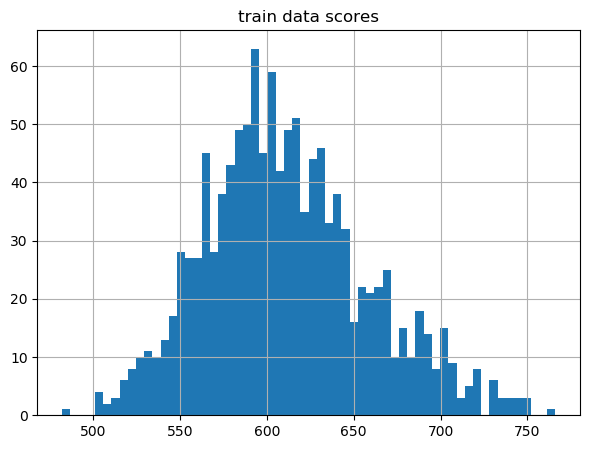

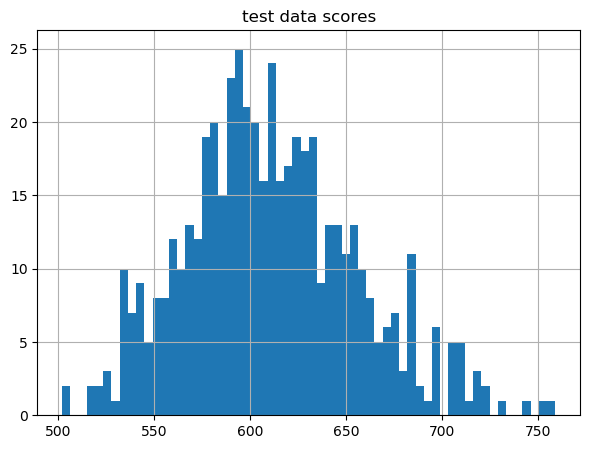

In [68]:
# sample code

# credit score for samples in test and train
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

#distrubution of scores on test data
train_score.hist(figsize=(7,5),bins=60)
plt.title('train data scores')
test_score.hist(figsize=(7,5),bins=60)
plt.title('test data scores')

**Calculate Percentage Correctly Classified measures on LR model**

In [69]:
# sample code
# print evaluation metrics of the model
y_pred = lr.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_pred, y_test))
print("\nPCC measures:")
print(classification_report(y_pred, y_test))



Confusion matrix:
[[474  38]
 [  1   1]]

PCC measures:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       512
           1       0.03      0.50      0.05         2

    accuracy                           0.92       514
   macro avg       0.51      0.71      0.50       514
weighted avg       0.99      0.92      0.96       514



**Evaluate the performance of logistic regression model with ROC**

Generate the ROC and calculate the AUC for the model using the scorecardpy methods. 

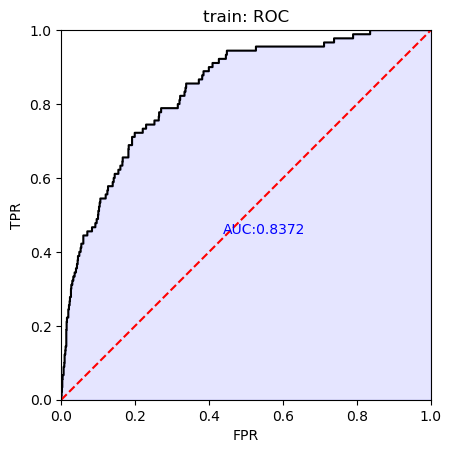

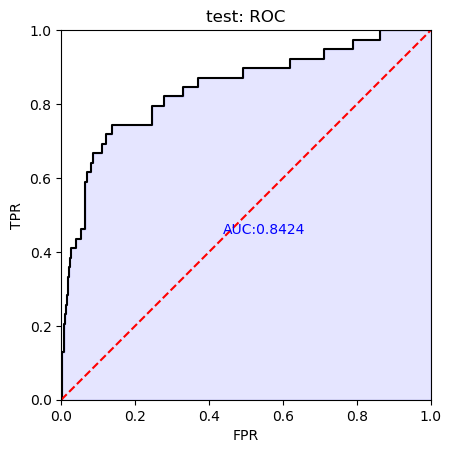

In [70]:
# sample code 

# evaluate the performance of the logistic regression
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc
train_perf = sc.perf_eva(y_train, train_pred, plot_type=['roc'], title = "train")
test_perf = sc.perf_eva(y_test, test_pred, plot_type=['roc'], title = "test")

In [71]:
len(stronger_df_filtered_forsc.columns)

12

## Coarse Classing

### Adjust the bin edge to ensure variables are monotonicity.

In [73]:
# strongerPredictors_list = ['STATUS','APARTMENTS_AVG',
# 'DAYS_BIRTH',
# 'OWN_CAR_AGE',
# 'ORGANIZATION_TYPE',
# 'DAYS_REGISTRATION',
# 'EXT_SOURCE_1' ,
# 'DAYS_EMPLOYED'  ,
# 'DAYS_ID_PUBLISH'  ,
# 'AMT_CREDIT' ,
# 'EXT_SOURCE_2' , 
# 'EXT_SOURCE_3' ]
# # 12 variables

**Plot the WOE** 

# COARSE CLASSING

**Create function to calculate WOE, IV and plot IV**

COARSE CLASSING 

Combine the code above into a parameterised function that you can use going forward

In [75]:
def woe_iv_bin_edges(data, variable_name, bin_edges, show_woe=False):
    
    bin_count = len(bin_edges)
    # create a copy to work on
    working_set_df = stronger_df_filtered_forsc.copy() 

    # reduce to just the variable and the target
    working_set_df= working_set_df[[variable_name, 'STATUS']]
    working_set_df['Bin_Range'] = pd.cut(working_set_df[variable_name], bins=bin_edges, include_lowest = True)

    # missing values have been assigned NaN when binning with pd.qcut 
    # rename NaN to 'Missing' and create bin rnage for those
    working_set_df['Bin_Range'] = working_set_df['Bin_Range'].astype('object')
    working_set_df['Bin_Range'].fillna('Missing', inplace = True)

    # create new dataframe for variable WOE and IV calcs
    variable_data = pd.DataFrame()

    # group by bin ranges
    variable_data['Bin_Range'] = working_set_df.groupby(by='Bin_Range', as_index=False).count()['Bin_Range']

    # count values and events
    variable_data['Count'] = working_set_df.groupby(by='Bin_Range', as_index=False).count()['STATUS']

    variable_data['Events'] = working_set_df.groupby(by='Bin_Range', as_index=False).sum()['STATUS']

    variable_data['Non_Events'] = variable_data['Count'] - variable_data['Events']

    # do WOE calculations
    variable_data['%_of_Events'] = variable_data['Events']/sum(variable_data['Events'])

    variable_data['%_of_Non_Events'] = variable_data['Non_Events']/sum(variable_data['Non_Events'])

    variable_data['WOE'] = np.log(variable_data['%_of_Non_Events'] / variable_data['%_of_Events'])

    variable_data['IV'] = (variable_data['%_of_Non_Events']-variable_data['%_of_Events'])*variable_data['WOE']
    
    IV = sum(variable_data['IV'])
    print('IV for ' + variable_name + " with bin edges at " + str(bin_edges) + ": ", str(np.round(IV, 4)))
    
    if show_woe == True:
            
        ffig, ax1 = plt.subplots(figsize=(20,6))
        sns.barplot(x = variable_data['Bin_Range'] , y = variable_data['Count'], alpha=0.5, ax = ax1)
        plt.xticks(rotation=45)

        ax2 = ax1.twinx()

        sns.lineplot(data = variable_data['WOE'], marker='o', sort = False, ax=ax2)
        plt.title("WOE plot for " + variable_name)
        plt.show()


In [ ]:
# check distribution
# stronger_df_filtered_forsc.hist(figsize=(20,20))
# plt.tight_layout()

## AMT_CREDIT

In [86]:
# #fine classing 
# # 167  AMT_CREDIT       [-inf,350000.0)    58.0
# # 168  AMT_CREDIT   [350000.0,550000.0)    39.0
# # 169  AMT_CREDIT   [550000.0,750000.0)    45.0
# # 170  AMT_CREDIT   [750000.0,950000.0)    57.0
# # 171  AMT_CREDIT  [950000.0,1200000.0)    93.0
# # 172  AMT_CREDIT       [1200000.0,inf)    63.0
                       

# woe_iv_bin_edges(stronger_df_filtered_forsc, 'AMT_CREDIT', bin_edges= [0,350000,550000, 750000, 950000,1200000], show_woe=True)

IV for AMT_CREDIT with bin edges at [0, 750000, 950000]:  0.1019


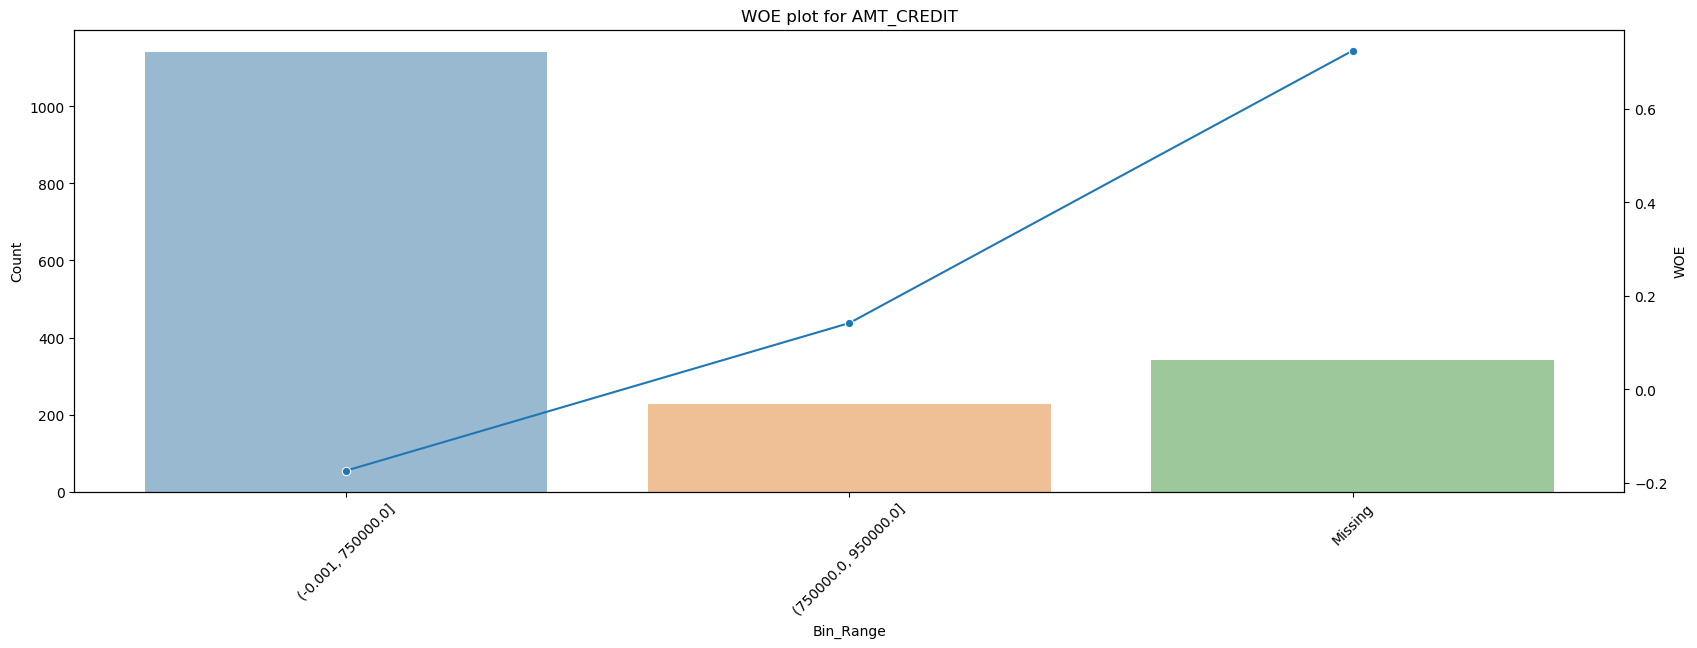

In [77]:
#coarse clssing
woe_iv_bin_edges(stronger_df_filtered_forsc, 'AMT_CREDIT', bin_edges= [0,750000, 950000], show_woe=True)

## APARTMENTS_AVG

In [85]:
# # fine classing
# # 82  APARTMENTS_AVG  [-inf,0.02)    54.0
# # 83  APARTMENTS_AVG  [0.02,0.05)    45.0
# # 84  APARTMENTS_AVG   [0.05,0.1)    56.0
# # 85  APARTMENTS_AVG   [0.1,0.12)    62.0
# # 86  APARTMENTS_AVG  [0.12,0.18)    46.0
# # 87  APARTMENTS_AVG  [0.18,0.23)    78.0
# # 88  APARTMENTS_AVG   [0.23,inf)    50.0,
                      
# woe_iv_bin_edges(stronger_df_filtered_forsc, 'APARTMENTS_AVG', bin_edges= [0, 0.02, 0.05, 0.1, 0.12,0.18, 0.23], show_woe=True)

In [ ]:
# coarse classing
# woe_iv_bin_edges(stronger_df_filtered_forsc, 'APARTMENTS_AVG', bin_edges= [0, 0.013, 0.08, 0.23, 0.25], show_woe=True)

In [ ]:
# coarse classing
# woe_iv_bin_edges(stronger_df_filtered_forsc, 'APARTMENTS_AVG', bin_edges= [0, 0.1, 0.23], show_woe=True)

In [ ]:
# coarse classing
# woe_iv_bin_edges(stronger_df_filtered_forsc, 'APARTMENTS_AVG', bin_edges= [0, 0.05, 0.1, 0.12, 0.18,0.23], show_woe=True)

## DAYS_BIRTH

In [87]:
# #fine classing
# # 149  DAYS_BIRTH      [-inf,-20000.0)    52.0
# # 150  DAYS_BIRTH  [-20000.0,-14500.0)    57.0
# # 151  DAYS_BIRTH  [-14500.0,-13000.0)    50.0
# # 152  DAYS_BIRTH  [-13000.0,-12500.0)    66.0
# # 153  DAYS_BIRTH  [-12500.0,-12000.0)    55.0
# # 154  DAYS_BIRTH       [-12000.0,inf)    49.0,
                       
# woe_iv_bin_edges(stronger_df_filtered_forsc, 'DAYS_BIRTH', bin_edges= [-20000, -14500, -13000, -12500, -12000], show_woe=True)

IV for DAYS_BIRTH with bin edges at [-19500, -18500, -14500]:  0.1359


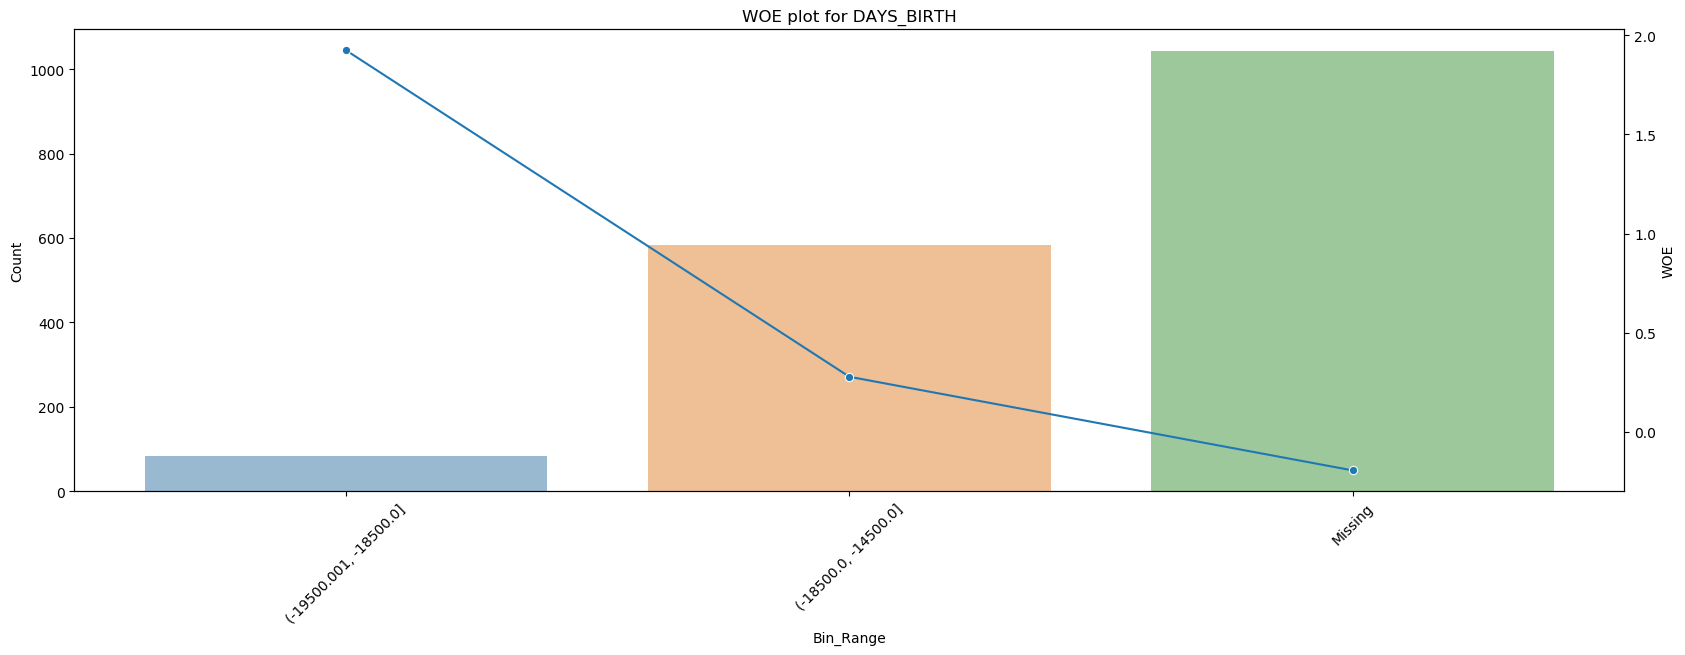

In [81]:
# coarse classing
woe_iv_bin_edges(stronger_df_filtered_forsc, 'DAYS_BIRTH', bin_edges= [-19500, -18500, -14500], show_woe=True)

## DAYS_EMPLOYED

In [88]:
# # fine classing
# # DAYS_EMPLOYED     [-inf,-3800.0)    65.0
# # 82  DAYS_EMPLOYED  [-3800.0,-2800.0)    51.0
# # 83  DAYS_EMPLOYED  [-2800.0,-2200.0)    67.0
# # 84  DAYS_EMPLOYED  [-2200.0,-1600.0)    57.0
# # 85  DAYS_EMPLOYED  [-1600.0,-1200.0)    46.0
# # 86  DAYS_EMPLOYED      [-1200.0,inf)    51.0,
                 
# woe_iv_bin_edges(stronger_df_filtered_forsc, 'DAYS_EMPLOYED', bin_edges= [-3800, -2800,  -2200, -1600, -1200,0], show_woe=True)

IV for DAYS_EMPLOYED with bin edges at [-13214, -3662, -2045, -1333, -700]:  0.1


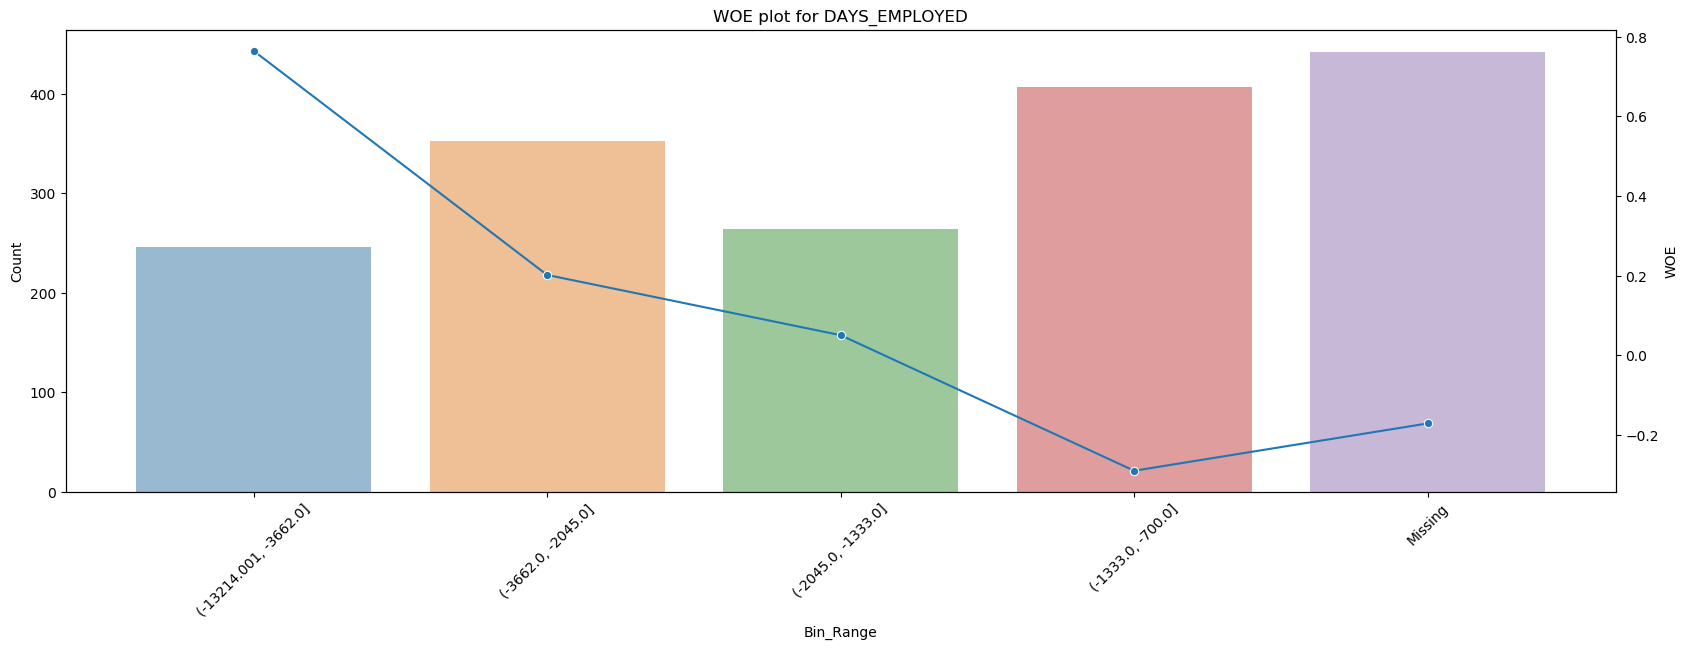

In [103]:
# coarse classing
woe_iv_bin_edges(stronger_df_filtered_forsc, 'DAYS_EMPLOYED', bin_edges= [-13214,-3662, -2045,-1333,-700], show_woe=True)

## DAYS_ID_PUBLISH

In [89]:
# # fine classing
# #  DAYS_ID_PUBLISH     [-inf,-4400.0)    53.0
# # 23  DAYS_ID_PUBLISH  [-4400.0,-4200.0)    68.0
# # 24  DAYS_ID_PUBLISH  [-4200.0,-3500.0)    58.0
# # 25  DAYS_ID_PUBLISH  [-3500.0,-2700.0)    43.0
# # 26  DAYS_ID_PUBLISH  [-2700.0,-2200.0)    73.0
# # 27  DAYS_ID_PUBLISH   [-2200.0,-400.0)    48.0
# # 28  DAYS_ID_PUBLISH       [-400.0,inf)    60.0,

# woe_iv_bin_edges(stronger_df_filtered_forsc, 'DAYS_ID_PUBLISH', bin_edges= [-4400, -4200, -3500,-2700, -2200, -400], show_woe=True)

In [ ]:
# course classing
# woe_iv_bin_edges(stronger_df_filtered_forsc, 'DAYS_ID_PUBLISH', bin_edges= [-4200, -3900, -3000,-2900, -2700,-2200, -400, 0], show_woe=True)

## OWN_CAR_AGE

In [90]:
# #fine classing
# # 35  OWN_CAR_AGE   [-inf,2.0)    60.0
# # 36  OWN_CAR_AGE    [2.0,3.0)    85.0
# # 37  OWN_CAR_AGE    [3.0,9.0)    55.0
# # 38  OWN_CAR_AGE   [9.0,12.0)    66.0
# # 39  OWN_CAR_AGE  [12.0,15.0)    38.0
# # 40  OWN_CAR_AGE  [15.0,18.0)    69.0
# # 41  OWN_CAR_AGE   [18.0,inf)    40.0,
# woe_iv_bin_edges(stronger_df_filtered_forsc, 'OWN_CAR_AGE', bin_edges= [0, 2, 3, 9, 12, 15, 18], show_woe=True)

In [ ]:
# #coarse classing
# woe_iv_bin_edges(stronger_df_filtered_forsc, 'OWN_CAR_AGE', bin_edges= [ 1, 2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15,17,20], show_woe=True)

# Creating Finalised Scorecard with adjusted bin edges

## Adjusted bins:
'AMT_CREDIT': [0, 750000, 950000],

'DAYS_BIRTH': [-19500, -18500, -14500],

'DAYS_EMPLOYED': [-13214,-3662, -2045,-1333,-700]

[INFO] creating woe binning ...


{'DAYS_EMPLOYED': <Figure size 640x480 with 2 Axes>}

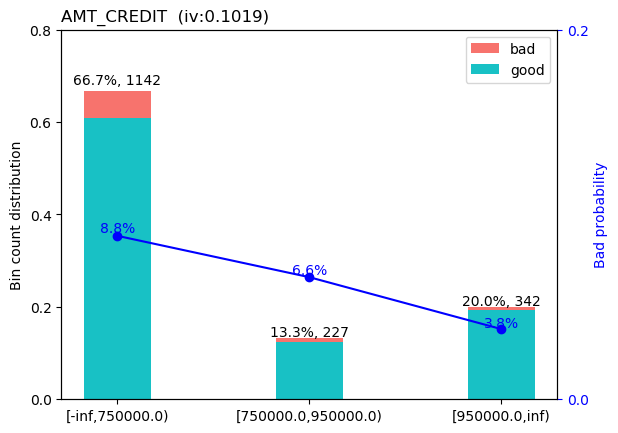

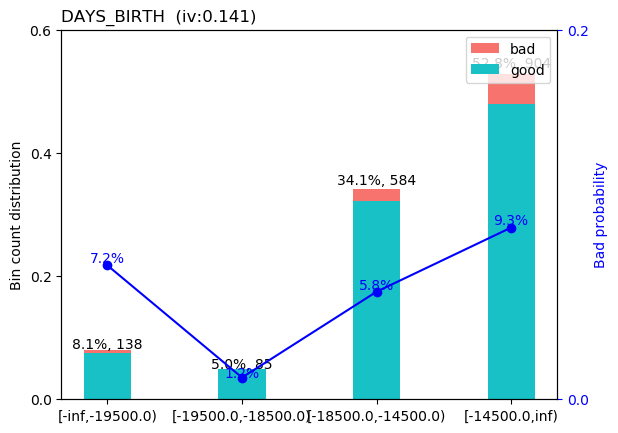

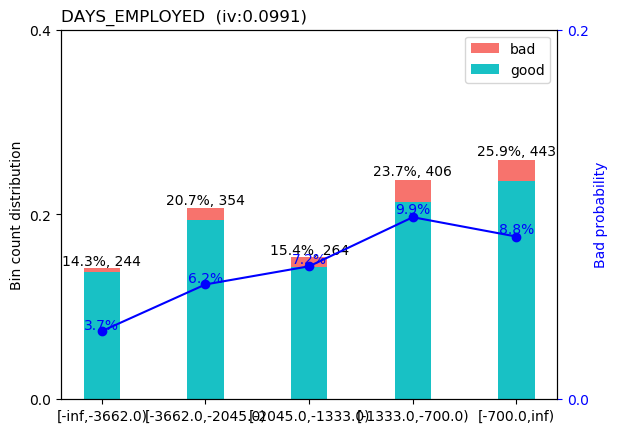

In [102]:
# 'DAYS_BIRTH', bin_edges= [-19500, -18500, -14500]

breaks_adj = {'AMT_CREDIT': [0, 750000, 950000],
    'DAYS_BIRTH': [-19500, -18500, -14500],
    'DAYS_EMPLOYED': [-13214,-3662, -2045,-1333,-700]}
bins2 = sc.woebin(stronger_df_filtered_forsc, y='STATUS',breaks_list=breaks_adj)
sc.woebin_plot(bins2['AMT_CREDIT'])
sc.woebin_plot(bins2['DAYS_BIRTH'])
sc.woebin_plot(bins2['DAYS_EMPLOYED'])


## Split

In [104]:
# sample code
# split data into 70% train and 30% test
train, test = sc.split_df(stronger_df_filtered_forsc, 'STATUS', ratio=0.7).values()
print(train.shape)
print(test.shape)

(1197, 12)
(514, 12)


In [105]:
# sample code
# prepare a dataset with the WOE values for Logistic Regression training
# woebin_ply() converts original values of input data into woe
train_woe = sc.woebin_ply(train, bins2)
test_woe = sc.woebin_ply(test, bins2)
train_woe

[INFO] converting into woe values ...
[INFO] converting into woe values ...


,STATUS,OWN_CAR_AGE_woe,EXT_SOURCE_2_woe,DAYS_BIRTH_woe,DAYS_ID_PUBLISH_woe,APARTMENTS_AVG_woe,AMT_CREDIT_woe,DAYS_EMPLOYED_woe,EXT_SOURCE_3_woe,EXT_SOURCE_1_woe,DAYS_REGISTRATION_woe,ORGANIZATION_TYPE_woe
218,0,-1.095235,-0.706512,-0.042812,-0.671421,-0.130543,-0.724476,-0.207460,-0.496346,-0.764203,0.553605,0.011574
236,0,-0.058317,-0.211780,-0.276925,-0.208410,-1.156929,-0.724476,0.292879,-0.496346,-1.236972,-0.648238,0.476324
328,0,-0.555589,-0.211780,-1.924184,0.231447,0.125930,0.173816,-0.050186,-0.496346,-0.764203,-0.648238,0.476324
335,0,-0.058317,-0.211780,0.228145,-0.671421,-0.130543,-0.724476,-0.050186,-0.496346,0.155257,0.553605,-0.819602
343,0,0.520717,-0.706512,-0.276925,-0.316728,-0.130543,-0.141903,0.168780,-0.496346,-1.236972,-0.648238,0.011574
...,...,...,...,...,...,...,...,...,...,...,...,...
304326,0,0.520717,-0.211780,-0.276925,-0.208410,-0.424561,0.173816,-0.755728,0.841105,0.155257,0.166776,0.011574
305644,0,-0.455198,-0.211780,0.228145,-0.671421,0.347148,0.173816,-0.050186,-0.496346,0.773714,-0.648238,0.476324
305649,0,0.520717,-0.706512,-0.276925,0.231447,0.401216,-0.141903,-0.050186,0.841105,0.155257,0.166776,0.011574
306911,0,-0.555589,0.436160,-0.276925,-0.208410,-0.130543,0.173816,0.168780,0.841105,0.155257,0.166776,0.476324


In [106]:
# sample code
#create the X, y parts of data for train and test
y_train = train_woe.loc[:,'STATUS']
X_train = train_woe.loc[:,train_woe.columns != 'STATUS']
y_test = test_woe.loc[:,'STATUS']
X_test = test_woe.loc[:,train_woe.columns != 'STATUS']

#create a logistic regression model object
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[ 1.01636304  0.8089225   0.34083484  0.83016043  0.7552091   0.78897674
  -0.20138012  0.61554809  0.41332175  0.52043119  0.87587206]]
[-2.46678734]


In [107]:
#generate a card from the model and bins. The scores will be based on probability of default from the model
card = sc.scorecard(bins2, lr, X_train.columns, points0 = 600, odds0 = 1/20, pdo = 20,
      basepoints_eq0 = True)

pprint.pprint(card)

{'AMT_CREDIT':       variable                  bin  points
29  AMT_CREDIT      [-inf,750000.0)    49.0
30  AMT_CREDIT  [750000.0,950000.0)    56.0
31  AMT_CREDIT       [950000.0,inf)    70.0,
 'APARTMENTS_AVG':           variable          bin  points
22  APARTMENTS_AVG  [-inf,0.02)    54.0
23  APARTMENTS_AVG  [0.02,0.05)    44.0
24  APARTMENTS_AVG   [0.05,0.1)    56.0
25  APARTMENTS_AVG   [0.1,0.12)    62.0
26  APARTMENTS_AVG  [0.12,0.18)    46.0
27  APARTMENTS_AVG  [0.18,0.23)    78.0
28  APARTMENTS_AVG   [0.23,inf)    50.0,
 'DAYS_BIRTH':       variable                  bin  points
11  DAYS_BIRTH      [-inf,-19500.0)    54.0
12  DAYS_BIRTH  [-19500.0,-18500.0)    72.0
13  DAYS_BIRTH  [-18500.0,-14500.0)    56.0
14  DAYS_BIRTH       [-14500.0,inf)    51.0,
 'DAYS_EMPLOYED':          variable                bin  points
32  DAYS_EMPLOYED     [-inf,-3662.0)    49.0
33  DAYS_EMPLOYED  [-3662.0,-2045.0)    52.0
34  DAYS_EMPLOYED  [-2045.0,-1333.0)    53.0
35  DAYS_EMPLOYED   [-1333.0,-700.

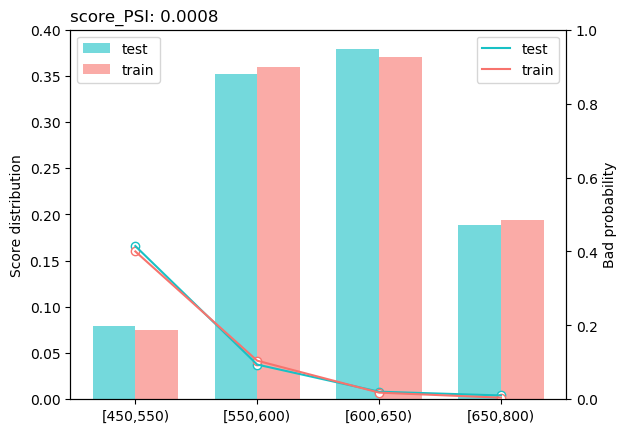

{'psi':   variable       PSI
 0    score  0.000774,
 'pic': {'score': <Figure size 640x480 with 2 Axes>}}

In [96]:
# psi
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

### Score all the test and train data

Use sc.scorecard_ply to score all the test and train data and examine the distribution of the scores

Text(0.5, 1.0, 'test data scores')

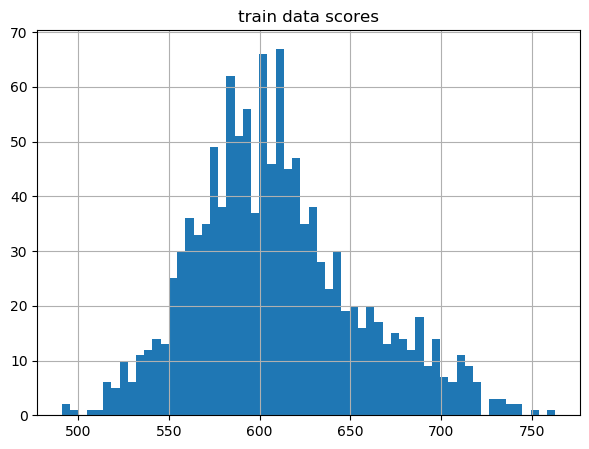

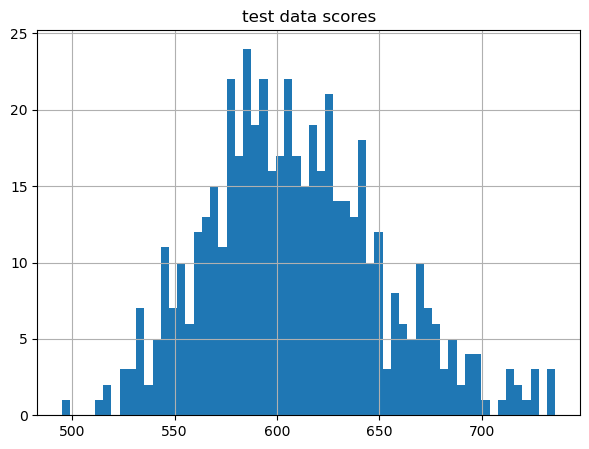

In [108]:
# sample code

# credit score for samples in test and train
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

#distrubution of scores on test data
train_score.hist(figsize=(7,5),bins=60)
plt.title('train data scores')
test_score.hist(figsize=(7,5),bins=60)
plt.title('test data scores')

**Calculate Percentage Correctly Classified measures on LR model**

In [69]:
# sample code
# print evaluation metrics of the model
y_pred = lr.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_pred, y_test))
print("\nPCC measures:")
print(classification_report(y_pred, y_test))



Confusion matrix:
[[474  38]
 [  1   1]]

PCC measures:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       512
           1       0.03      0.50      0.05         2

    accuracy                           0.92       514
   macro avg       0.51      0.71      0.50       514
weighted avg       0.99      0.92      0.96       514



**Evaluate the performance of logistic regression model with ROC**

Generate the ROC and calculate the AUC for the model using the scorecardpy methods. 

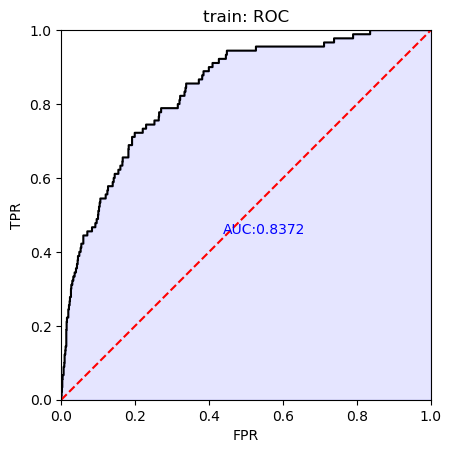

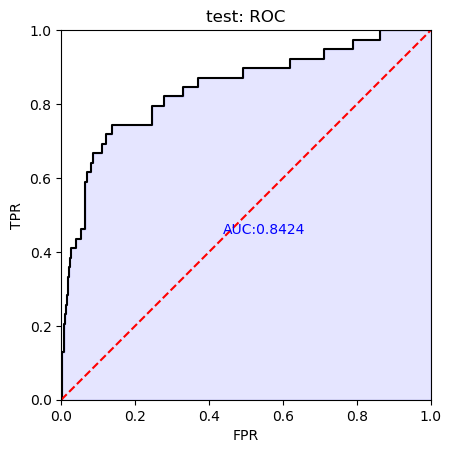

In [70]:
# sample code 

# evaluate the performance of the logistic regression
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc
train_perf = sc.perf_eva(y_train, train_pred, plot_type=['roc'], title = "train")
test_perf = sc.perf_eva(y_test, test_pred, plot_type=['roc'], title = "test")

In [71]:
len(stronger_df_filtered_forsc.columns)

12

# Test scorecard

Use sc.scorecard_ply to score a new application with values


### Get a row of data that is rejected to test 

In [ ]:
#rejected
stronger_df_filtered_forsc[stronger_df_filtered_forsc['STATUS'] == 1].head(1)

In [ ]:
#approved
stronger_df_filtered_forsc[stronger_df_filtered_forsc['STATUS'] == 0].head(1)

In [ ]:
# pass
# sample code
# calulate credit score for new application

col = ['APARTMENTS_AVG',
'DAYS_BIRTH',
'OWN_CAR_AGE',
'ORGANIZATION_TYPE',
'DAYS_REGISTRATION',
'EXT_SOURCE_1' ,
'DAYS_EMPLOYED'  ,
'DAYS_ID_PUBLISH'  ,
'AMT_CREDIT' ,
'EXT_SOURCE_2' , 
'EXT_SOURCE_3' ]
val = [[0.0722, -21646, 2, 'Business Entity Type 3', -381, 0.717761, -2127, -4264, 1078200.0, 0.750443, 0.511892]]
new_appl = pd.DataFrame(val, columns=col)

new_appl_score = sc.scorecard_ply(new_appl, card, only_total_score=False).transpose()
new_appl_score.index = new_appl_score.index.str.replace('_points', '')

summary =  pd.concat([new_appl.transpose(), new_appl_score], axis=1)
summary.columns = ['App Value','Points']
print(summary)


In [ ]:
# sample code
# calulate credit score for new application

col = ['APARTMENTS_AVG',
'DAYS_BIRTH',
'OWN_CAR_AGE',
'ORGANIZATION_TYPE',
'DAYS_REGISTRATION',
'EXT_SOURCE_1' ,
'DAYS_EMPLOYED'  ,
'DAYS_ID_PUBLISH'  ,
'AMT_CREDIT' ,
'EXT_SOURCE_2' , 
'EXT_SOURCE_3' ]
val = [[0.0866, -11391, 14, 'Security', -199, 0.065419, -401, -355, 675000.0, 0.629466, 0.192942]]
new_appl = pd.DataFrame(val, columns=col)

new_appl_score = sc.scorecard_ply(new_appl, card, only_total_score=False).transpose()
new_appl_score.index = new_appl_score.index.str.replace('_points', '')

summary =  pd.concat([new_appl.transpose(), new_appl_score], axis=1)
summary.columns = ['App Value','Points']
print(summary)